# Visual Assistence

## Import Data & Module

### Load data menggunakan API KAGGLE

In [2]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

##### VA Dataset

In [4]:
!kaggle datasets download -d aishrules25/automatic-image-captioning-for-visually-impaired

Dataset URL: https://www.kaggle.com/datasets/aishrules25/automatic-image-captioning-for-visually-impaired
License(s): unknown
 99% 305M/308M [00:03<00:00, 69.4MB/s]
100% 308M/308M [00:05<00:00, 64.4MB/s]


#### Import Module

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!python3 -m pip install yolov4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yolov4: filename=yolov4-3.2.0-cp310-cp310-linux_x86_64.whl size=153758 sha256=d8e249d1c20bfa6b32d7b8f9612da6849866f9af50439492f09c40dea1ebc640
  Stored in directory: /root/.cache/pip/wheels/3e/11/2f/84143336f3368a00ba3c7261850dbf6df9764287adb9f1d564
Successfully built yolov4


In [7]:
# pip install git+https://github.com/michelecafagna26/cider.git

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [9]:
import tensorflow as tf
from yolov4.tf import YOLOv4
import cv2
import numpy as np

Call tf.config.experimental.set_memory_growth(GPU0, True)


#### Import Function

In [10]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2024-05-14 07:32:58--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0.001s  

2024-05-14 07:32:58 (15.7 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [11]:
unzip_data("/content/automatic-image-captioning-for-visually-impaired.zip")

In [12]:
image_path = '/content/visuallyimpair/visual_dataset'

In [13]:
import re
data = pd.read_csv("/content/visuallyimpair/visual_text/visual.token.txt")

data.columns.values[0] ="Images"
data=data.Images.str.split("#",expand=True)
data.columns=['image','caption']
data['caption'] = [re.sub(r'[0-9]\t', '', caption) for caption in data['caption']]

data.sample(10)

image                                            caption
141          greensig31.jpg                         Green signal please walk .
7350           church26.jpg                         A church is ahead of you .
5703         wetfloor26.jpg    Please mind your steps wet floor ahead of you .
3426     poundtwenty_31.jpg                      This is a twenty pound note .
7199           wallet31.jpg           You can pick the wallet from the table .
983               bus12.jpg                  Bus has arrived at the bus stop .
7015            trash44.jpg  There is a bin ahead of you if you want you ca...
4727         stairsup_1.jpg                 Please be careful upstairs ahead .
4487  eurotwohundred_43.jpg                  This is a two hundred euro note .
338               push3.jpg        Please press the push button ahead of you .

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    7999 non-null   object
 1   caption  7999 non-null   object
dtypes: object(2)
memory usage: 125.1+ KB


In [15]:
data.shape

(7999, 2)

#### Visual Image VA

In [16]:
walk_through_dir("/content/visuallyimpair/visual_dataset")

There are 0 directories and 1600 images in '/content/visuallyimpair/visual_dataset'.


In [17]:
import os
import glob

# Tentukan direktori yang ingin Anda periksa
direktori = '/content/visuallyimpair/visual_dataset'  # Ganti dengan jalur direktori yang sesuai

# Hitung jumlah gambar dalam direktori menggunakan glob
jumlah_gambar_Flick8k = len(glob.glob(os.path.join(direktori, '*.png'))) + len(glob.glob(os.path.join(direktori, '*.jpg')))
print(f"Jumlah Gambar VA : {jumlah_gambar_Flick8k}")

Jumlah Gambar VA : 1600


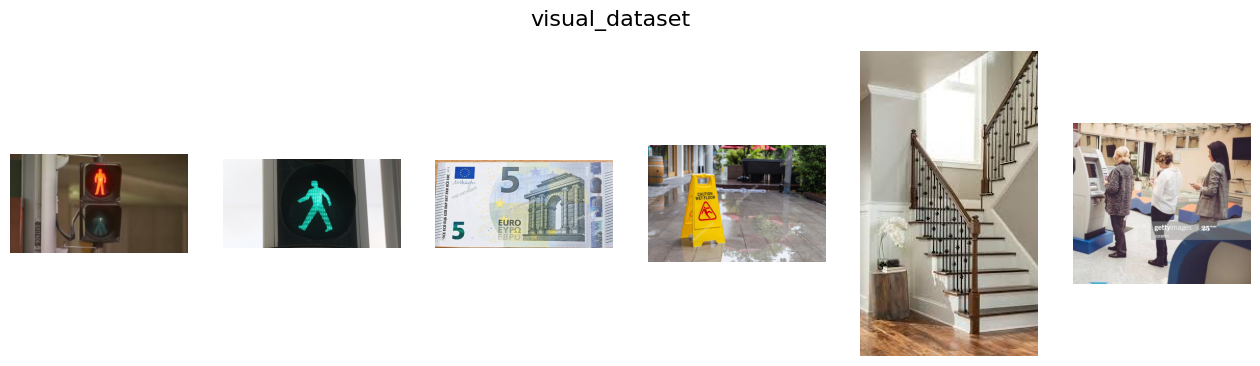

In [18]:
# View a random image from the training dataset
img = view_random_images(target_dir="/content/visuallyimpair/",
                        target_class="visual_dataset",
                        num_images = 6)

In [19]:
from textwrap import wrap

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"/content/visuallyimpair/visual_dataset/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

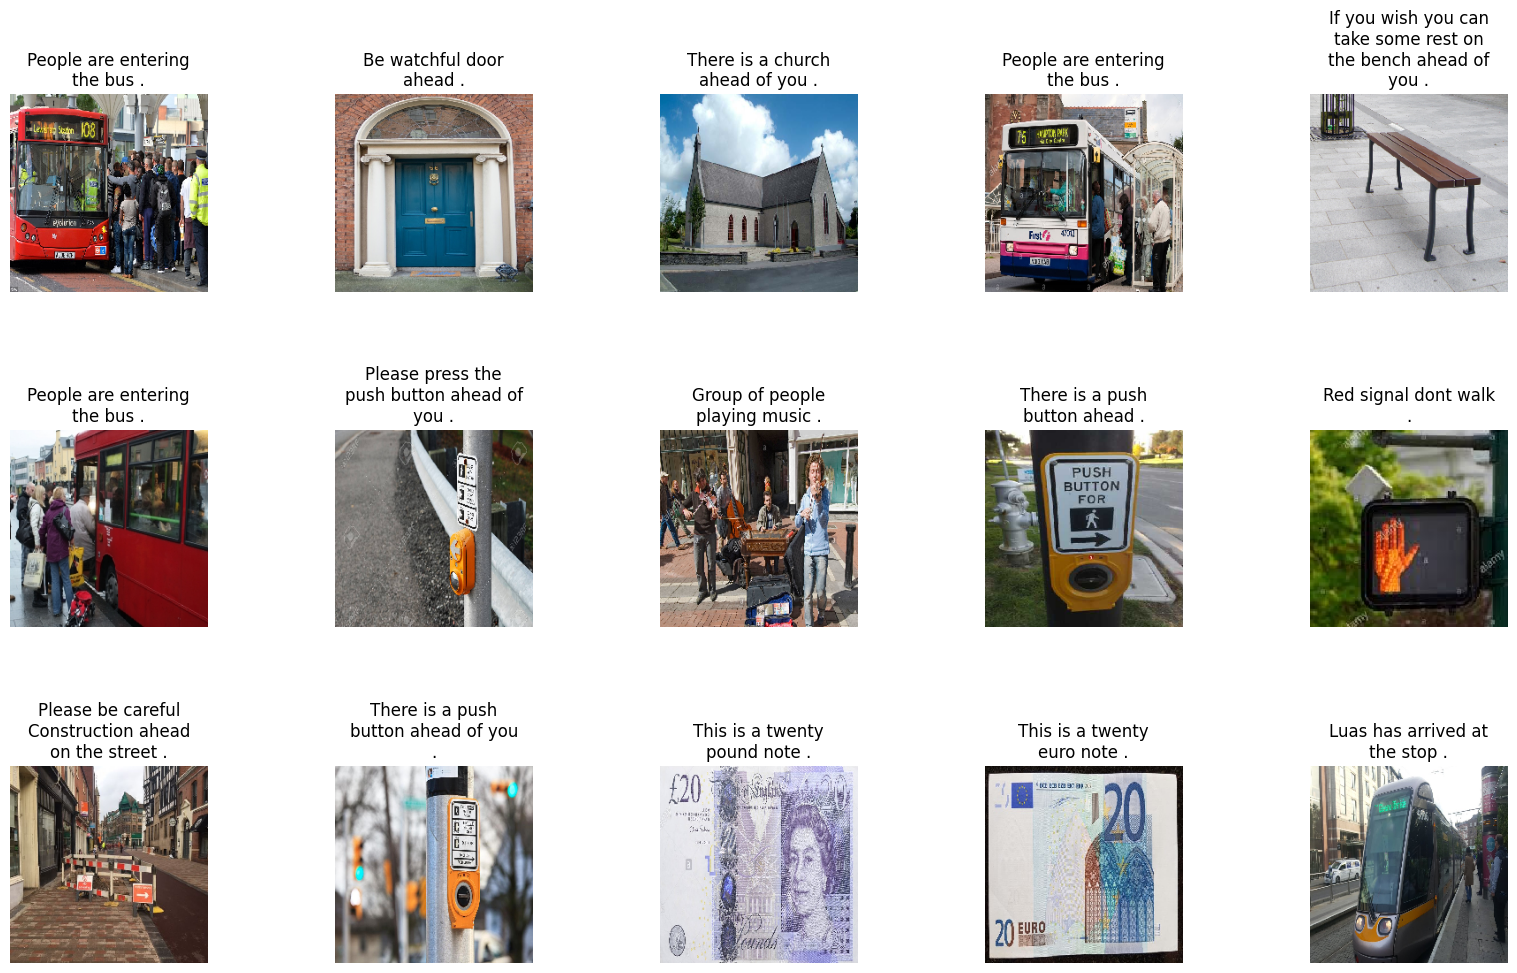

In [21]:
display_images(data.sample(15))

In [22]:
# Duplicate the DataFrame
df_unik = data.copy()
# Menghilangkan duplikat berdasarkan kolom "image"
df_unik = df_unik.drop_duplicates(subset=['image'])
df_unik.head()

image                     caption
0   greensig1.jpg  Green signal please walk .
4   greensig2.jpg  Green signal please walk .
9   greensig3.jpg  Green signal please walk .
14  greensig4.jpg  Green signal please walk .
19  greensig5.jpg  Green signal please walk .

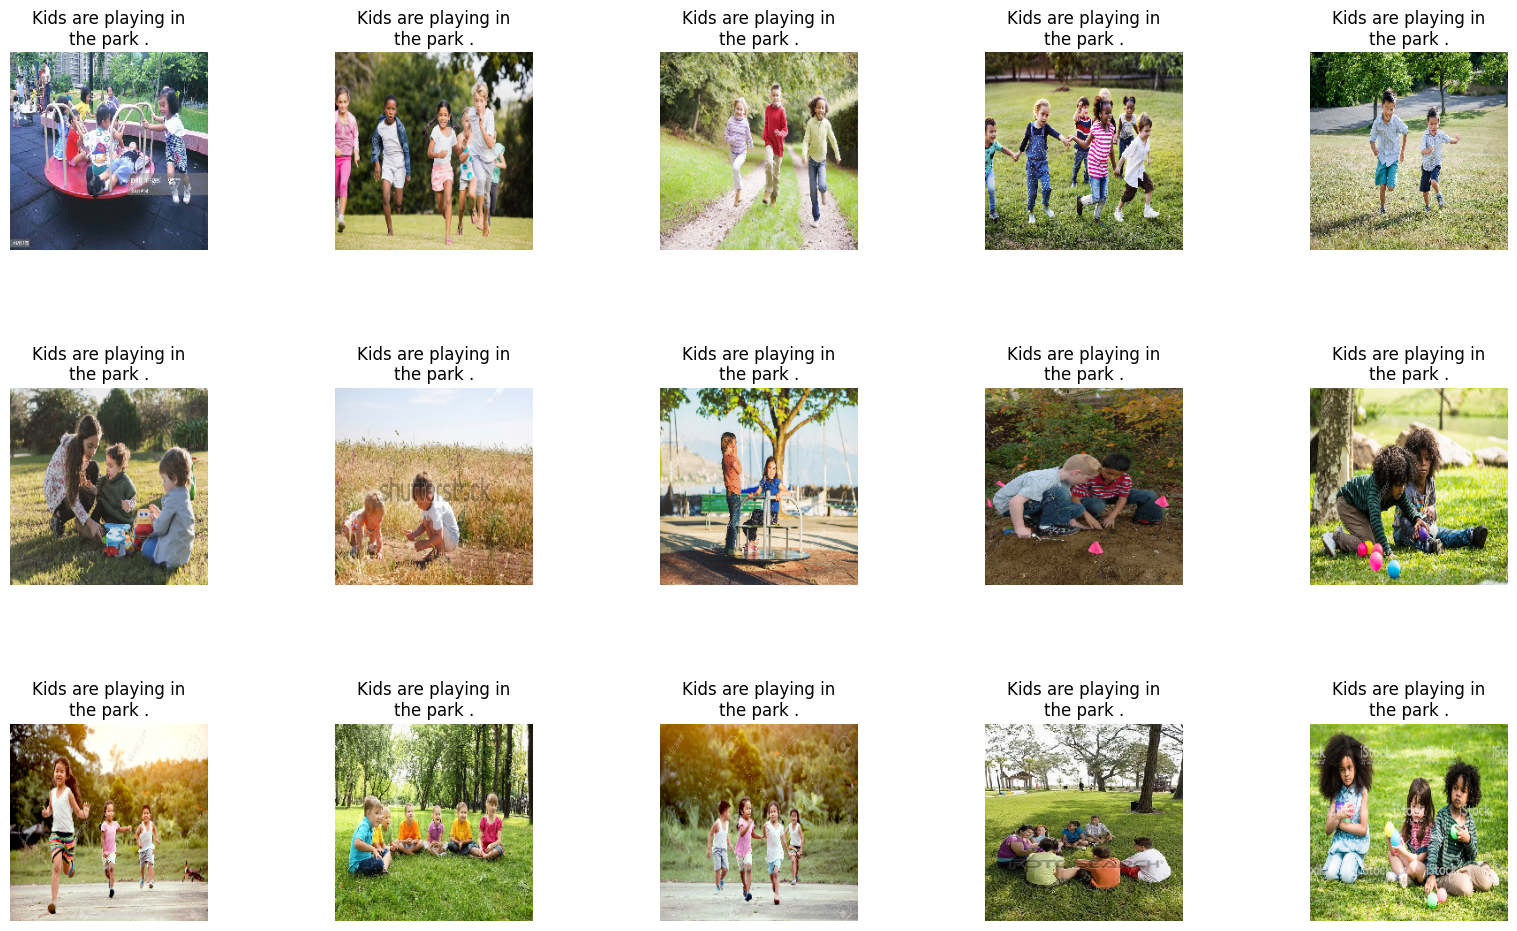

In [23]:
display_images(df_unik.tail(15))

## Pre-Processing Teks

In [24]:
def load_captions(file_path):
    with open(file_path, 'r') as f:
        captions = f.readlines()
        # # Lowercasing  the captions
        # captions = [caption.lower() for caption in captions[1:]]
    return captions

captions_path= "/content/visuallyimpair/visual_text/visual.token.txt"
images_directory = "/content/visuallyimpair/visual_dataset/"

# Loading the captions from the dataset
captions = load_captions(captions_path)
captions[:15:3]

['greensig1.jpg#0\tGreen signal please walk .\n',
 'greensig1.jpg#3\tGreen signal please walk .\n',
 'greensig2.jpg#1\tGreen signal please walk .\n',
 'greensig2.jpg#4\tGreen signal please walk .\n',
 'greensig3.jpg#2\tGreen signal please walk .\n']

### Cleaning the captions

In [25]:
import re
from nltk.corpus import stopwords

# Download NLTK stopwords if you haven't already
import nltk
nltk.download('stopwords')

def clean_text(text):
    # Define stop words
    stop_words = set(stopwords.words('english'))

    # Removing punctuation marks
    text = re.sub(r'[^\w\s]', '', text)

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Removing extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Lowercasing the captions
    text = text.lower()

    # Removing stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Add start and end
    text = 'start '+text+' end'

    return text

# Cleaning the captions
cleaned_captions = [clean_text(caption.split('\t')[1]) for caption in captions]
cleaned_captions[:15:2]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end']

In [26]:
# # Image ID + \t + Caption
# captions_IDs = []
# for i in range(len(cleaned_captions)):
#     #  Adding 'start' word and 'end' word to the captions
#     item = captions[i].split('#')[0]+'\t'+'start '+cleaned_captions[i]+' end\n'
#     captions_IDs.append(item)

# captions_IDs[:20:3], len(captions_IDs)

In [27]:
# Image ID + \t + Caption
captions_IDs = []
for i in range(len(cleaned_captions)):
    #  Adding 'start' word and 'end' word to the captions
    item = captions[i].split('#')[0]+'\t'+cleaned_captions[i]
    captions_IDs.append(item)

captions_IDs[:20:3], len(captions_IDs)

(['greensig1.jpg\tstart green signal please walk end',
  'greensig1.jpg\tstart green signal please walk end',
  'greensig2.jpg\tstart green signal please walk end',
  'greensig2.jpg\tstart green signal please walk end',
  'greensig3.jpg\tstart green signal please walk end',
  'greensig4.jpg\tstart green signal please walk end',
  'greensig4.jpg\tstart green signal please walk end'],
 8000)

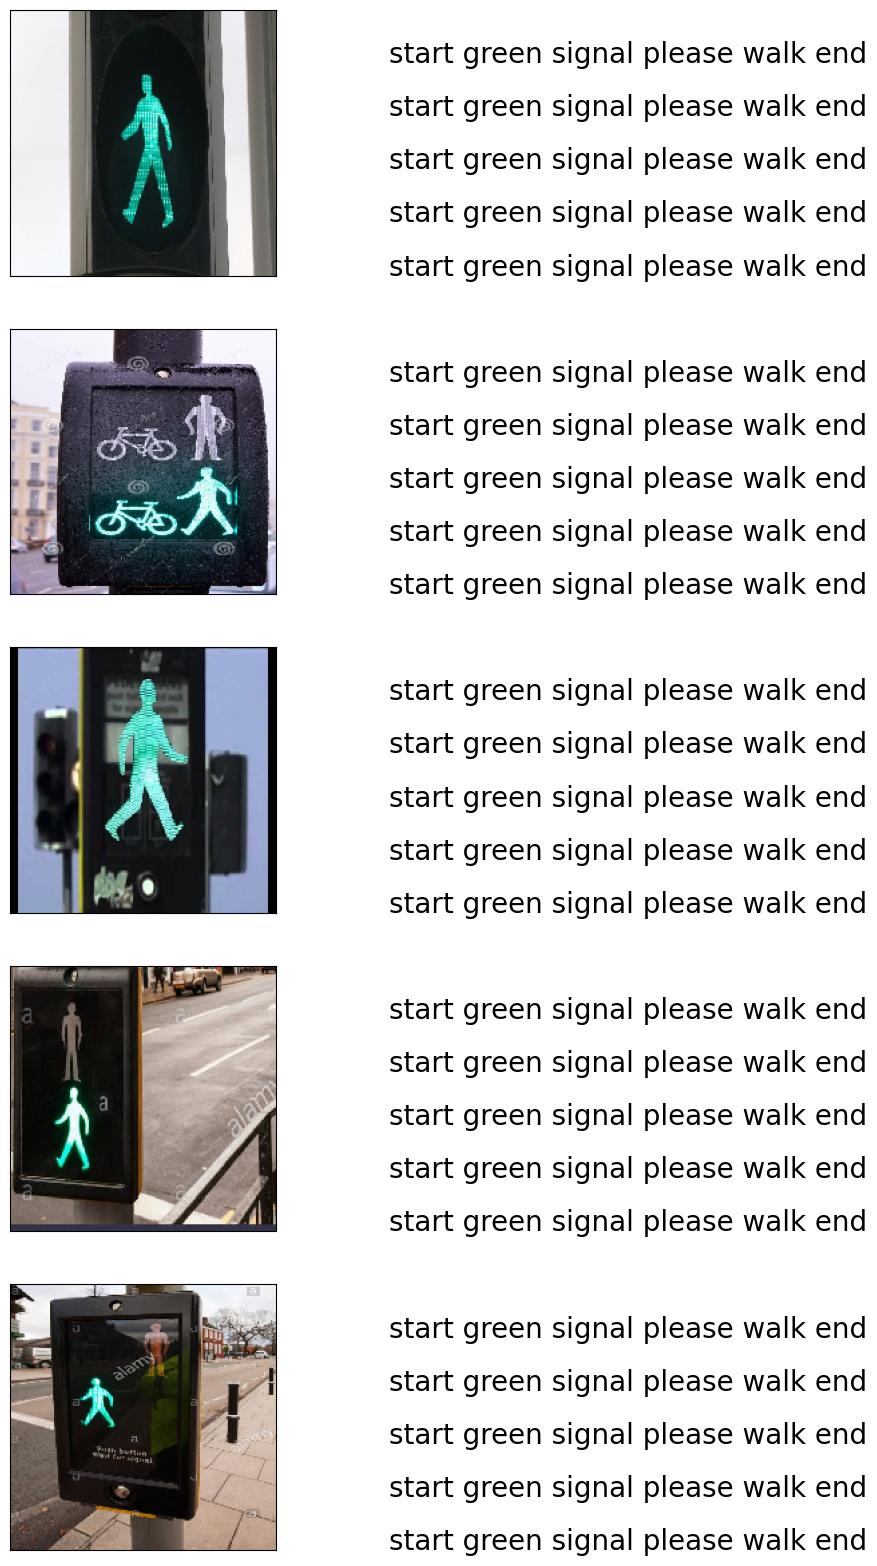

In [28]:
def visualaization(data, num_of_images):
    # We use dictionaries to access captions of each image by its ID
    captions_dictionary = {}
    for item in data[100:100+(num_of_images)*5]:
        image_id, caption = item.split('\t')
        if image_id not in captions_dictionary:
            captions_dictionary[image_id] = []
        captions_dictionary[image_id].append(caption)
    else:
        list_captions = [x for x in captions_dictionary.items()]

    count = 1
    fig = plt.figure(figsize=(10,20))
    for filename in list(captions_dictionary.keys()):
        captions = captions_dictionary[filename]
        image_load = load_img(images_directory+filename, target_size=(199,199,3))

        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()

visualaization(captions_IDs, 5)

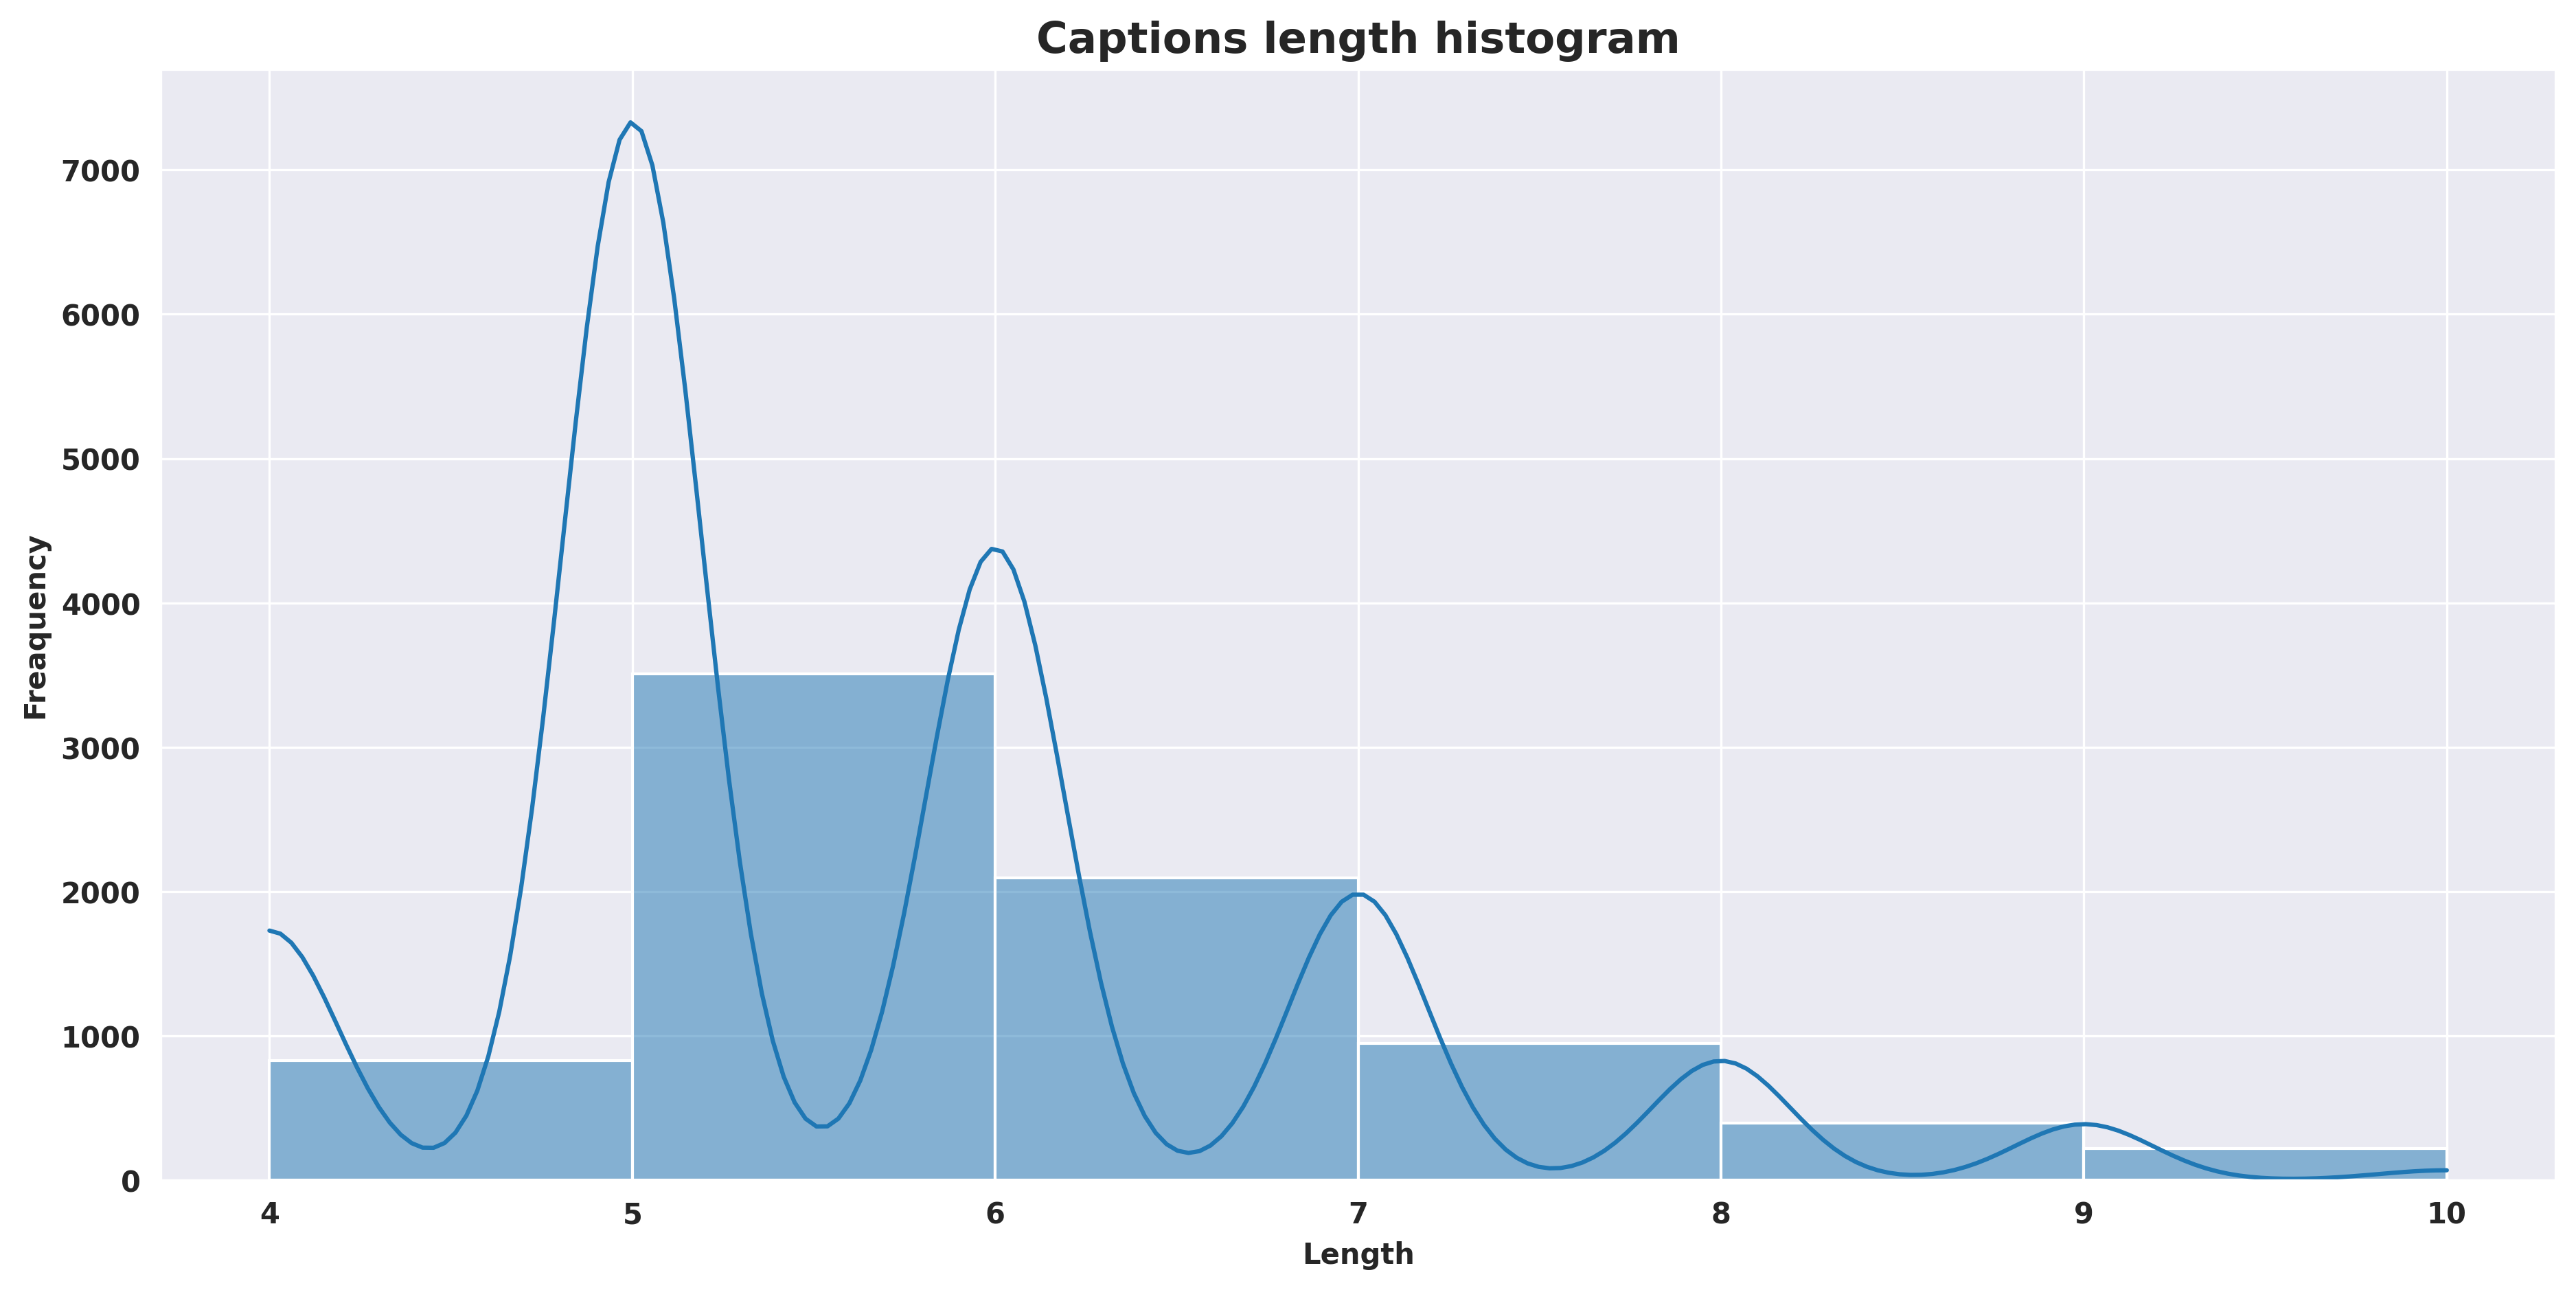

In [29]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1)
    plt.title('Captions length histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Freaquency', fontweight='bold')
    plt.show()

captions_length(cleaned_captions)

In [30]:
from collections import Counter
import plotly.graph_objects as go

def word_occurrences(data):
    # Combining all sentences into a single string
    all_text = ' '.join(data)
    # Splitting the text into words and count occurrences
    word_counts = Counter(all_text.split())

    words = list(word_counts.keys())[1:30]
    values = list(word_counts.values())[1:30]

    # Normalize values to be between 0 and 1
    normalized_values = np.array(values) / np.max(values)
    colors = np.array(['rgba(30, 58, 138, {})'.format(0.4 + 0.5 * (value)) for value in normalized_values])

    fig = go.Figure(data=[go.Pie(labels=words, values=values, hole=.6, marker=dict(colors=colors), textinfo='label')])

    fig.update_layout(title_text='Word occurrences in captions (except for letter \'a\')', title_font=dict(size=23, family='Balto'))

    fig.show()

word_occurrences(cleaned_captions)

### Tokenizing captions and setting vocab size

In [31]:
captions_IDs[:10]

['greensig1.jpg\tstart green signal please walk end',
 'greensig1.jpg\tstart green signal please walk end',
 'greensig1.jpg\tstart green signal please walk end',
 'greensig1.jpg\tstart green signal please walk end',
 'greensig1.jpg\tstart green signal please walk end',
 'greensig2.jpg\tstart green signal please walk end',
 'greensig2.jpg\tstart green signal please walk end',
 'greensig2.jpg\tstart green signal please walk end',
 'greensig2.jpg\tstart green signal please walk end',
 'greensig2.jpg\tstart green signal please walk end']

In [32]:
cleaned_captions[:10]

['start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end']

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenize_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    return tokenizer

In [34]:
# Tokenizing the captions and creating word-to-index mapping
tokenizer = tokenize_captions(cleaned_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

122

## Splitting the data into tain, validation and test sets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
images_directory = "/content/visuallyimpair/visual_dataset/"

In [37]:
# Storing all image IDs
all_image_ids = os.listdir(images_directory)
all_image_ids

# Splitting image IDs
train_image_ids, val_image_ids = train_test_split(all_image_ids, test_size=0.25, random_state=42)
val_image_ids, test_image_ids = train_test_split(val_image_ids, test_size=0.5, random_state=42)

train_captions, val_captions, test_captions = [], [], []
for caption in captions_IDs:
    image_id, _ = caption.split('\t')

    if image_id in train_image_ids:
        train_captions.append(caption)

    elif image_id in val_image_ids:
        val_captions.append(caption)

    elif image_id in test_image_ids:
        test_captions.append(caption)
    else:
        print(caption)

train_captions[0], val_captions[0], test_captions[0], len(train_captions)/5, len(val_captions)/5, len(test_captions)/5

('greensig1.jpg\tstart green signal please walk end',
 'greensig6.jpg\tstart green signal please walk end',
 'greensig15.jpg\tstart green signal please walk end',
 1200.0,
 200.0,
 200.0)

In [38]:
print(len(train_image_ids))
print(len(val_image_ids))
print(len(test_image_ids))

1200
200
200


In [39]:
# train_image_ids

## Ekstraksi Fitur No Augmentation

### Extracting Image feature using The VGG16 model

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

modelVGG16 = VGG16()
modelVGG16 = Model(inputs = modelVGG16.inputs, outputs=modelVGG16.layers[-2].output)

553467096/553467096 [==============================] - 7s 0us/step


In [41]:
import os
from tqdm import tqdm_notebook

# extract features from image
train_image_featuresVgg16, val_image_featuresVgg16, test_image_featuresVgg16 = {}, {}, {}  # A Dictionary to store image features with their corresponding IDs
images_directory = "/content/visuallyimpair/visual_dataset/"
pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
  image_id = caption.split('\t')[0]
  image_path = os.path.join(images_directory, image_id)
  image = load_img(image_path, target_size=(224, 224))
  # convert image pixels to numpy array
  image = img_to_array(image)
  # reshape data for model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # preprocess image for vgg
  image = preprocess_input(image)
  # extract features
  feature = modelVGG16.predict(image, verbose=0)

  if image_id in train_image_ids:
      train_image_featuresVgg16[image_id] = feature
      pbar.update(1)
  elif image_id in val_image_ids:
      val_image_featuresVgg16[image_id] = feature
      pbar.update(1)
  elif image_id in test_image_ids:
      test_image_featuresVgg16[image_id] = feature
      pbar.update(1)
  else:
      print('Unknown image ID !')

pbar.close()

<ipython-input-41-a8f72f1b2088>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1600 [00:00<?, ?it/s]

In [42]:
# Defining the CNN output dimension (size of feature vector from InceptionV3)
cnn_output_dim_VGG16 = modelVGG16.output_shape[1] # 4096
cnn_output_dim_VGG16

4096

In [43]:
import numpy as np

# Misalkan test_image_features adalah dictionary Anda
# Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
key_example = next(iter(train_image_featuresVgg16))

# Mendapatkan nilai array dari dictionary menggunakan kunci
value_array = train_image_featuresVgg16[key_example]

# Mengecek bentuk (shape) dari array
array_shape = np.array(value_array).shape

print("Bentuk array:", array_shape)

Bentuk array: (1, 4096)


### Extracting Image features using The Resnet model

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

modelResNet50 = ResNet50()
modelResNet50 = Model(inputs = modelResNet50.inputs, outputs=modelResNet50.layers[-2].output)

102967424/102967424 [==============================] - 0s 0us/step


In [45]:
import os
from tqdm import tqdm_notebook

# extract features from image
train_image_featuresResnet, val_image_featuresResnet, test_image_featuresResnet = {}, {}, {}  # A Dictionary to store image features with their corresponding IDs
images_directory = "/content/visuallyimpair/visual_dataset/"
pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
  image_id = caption.split('\t')[0]
  image_path = os.path.join(images_directory, image_id)
  image = load_img(image_path, target_size=(224, 224))
  # convert image pixels to numpy array
  image = img_to_array(image)
  # reshape data for model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # preprocess image for vgg
  image = preprocess_input(image)
  # extract features
  feature = modelResNet50.predict(image, verbose=0)

  if image_id in train_image_ids:
      train_image_featuresResnet[image_id] = feature
      pbar.update(1)
  elif image_id in val_image_ids:
      val_image_featuresResnet[image_id] = feature
      pbar.update(1)
  elif image_id in test_image_ids:
      test_image_featuresResnet[image_id] = feature
      pbar.update(1)
  else:
      print('Unknown image ID !')

pbar.close()

<ipython-input-45-7c17c5c64a97>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1600 [00:00<?, ?it/s]

In [46]:
import numpy as np

# Misalkan train_image_features adalah dictionary Anda
# Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
key_example = next(iter(train_image_featuresResnet))

# Mendapatkan nilai array dari dictionary menggunakan kunci
value_array = train_image_featuresResnet[key_example]

# Mengecek bentuk (shape) dari array
array_shape = np.array(value_array).shape

print("Bentuk array:", array_shape)

Bentuk array: (1, 2048)


In [47]:
# Defining the CNN output dimension (size of feature vector from InceptionV3)
cnn_output_dim_Resnet = modelResNet50.output_shape[1] # 2048

In [48]:
# import pickle
# from google.colab import files

# # store features in pickle
# pickle.dump(train_image_featuresResnet, open(os.path.join('/content', 'train_image_features(batch_normalization).pkl'), 'wb'))
# pickle.dump(val_image_featuresResnet, open(os.path.join('/content', 'val_image_features(batch_normalization).pkl'), 'wb'))
# pickle.dump(test_image_featuresResnet, open(os.path.join('/content', 'test_image_features(batch_normalization).pkl'), 'wb'))
# # Unduh file yang telah dibuat
# files.download('train_image_features(batch_normalization).pkl')
# files.download('val_image_features(batch_normalization).pkl')
# files.download('test_image_features(batch_normalization).pkl')

### Extracting Image feature using The Yolo model

In [49]:
# import tensorflow as tf

# yolo_new_input = yolo.model.input
# yolo_hidden_layer = yolo.model.output
# # yolo_hidden_layer = yolo.model.get_layer('convolutional_109').output

# yolo_image_features_extract_model = tf.keras.Model(yolo_new_input, yolo_hidden_layer)

In [50]:
# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=(299, 299))
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = tf.keras.applications.inception_v3.preprocess_input(img)
#     return img

# def extract_image_features(model, image_path):
#     img = preprocess_image(image_path)
#     features = model.predict(img, verbose=0)
#     return features

In [51]:
# def yolo_load_image(image_path):
#     frame = cv2.imread(image_path)
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     # height, width, _ = frame.shape
#     frame = yolo.resize_image(frame)
#     frame = frame / 255.0
#     frame = frame[np.newaxis, ...].astype(np.float32)
#     return frame

In [52]:
# Initialize YOLOv4
yolo = YOLOv4()

# File paths
names_path = "/content/drive/MyDrive/coco.names"
cfg_path = "/content/drive/MyDrive/yolov4-tiny.cfg"
weights_path = "/content/drive/MyDrive/yolov4-tiny.weights"

yolo.config.parse_names(names_path)
yolo.config.parse_cfg(cfg_path)
yolo.make_model()
yolo.load_weights(weights_path, weights_type="yolo")

In [53]:
def partition(arr, low, high):
	i = (low - 1)  # index of smaller element
	pivot = arr[high]  # pivot

	for j in range(low, high):

		# If current element is smaller than or
		# equal to pivot
		if arr[j][6] >= pivot[6]:  # the width of the box times the height of the box times the confidence rate # hadie

			# increment index of smaller element
			i = i + 1
			arr[i], arr[j] = arr[j], arr[i]

	arr[i + 1], arr[high] = arr[high], arr[i + 1]
	return (i + 1)

def quickSort(arr, low, high):
	if len(arr) == 1:
		return arr
	if low < high:

		# pi is partitioning index, arr[p] is now
		# at right place
		pi = partition(arr, low, high)

		# Separately sort elements before
		# partition and after partition
		quickSort(arr, low, pi - 1)
		quickSort(arr, pi + 1, high)

def image_path_to_yolo_bounding_boxes(image_path):  # , coco_dict, word_index):
    frame = cv2.imread(image_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    bboxes = yolo.predict(frame, prob_thresh=0.25)
    bboxes = bboxes.tolist()
    n = len(bboxes)
    # for each bounding box, append (area * confidence)
    for i in range(n):
        bboxes[i].append(bboxes[i][2] * bboxes[i][3] * bboxes[i][5])
        # obj_class_name = coco_dict[int(bboxes[i][4])].replace(" ", "")
        # if obj_class_name in word_index:
        #    bboxes[i][4] = word_index[coco_dict[int(bboxes[i][4])].replace(" ", "")]
        # else:
        #    bboxes[i][4] = word_index['<pad>']
    quickSort(bboxes, 0, n - 1)
    bboxes = np.array(bboxes)
    return bboxes

In [54]:
import os
from tqdm import tqdm_notebook

features_shape = 2048
# extract features from image
train_image_featuresYolo, val_image_featuresYolo, test_image_featuresYolo = {}, {}, {}  # A Dictionary to store image features with their corresponding IDs
images_directory = "/content/visuallyimpair/visual_dataset/"
pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
  image_id = caption.split('\t')[0]
  image_path = os.path.join(images_directory, image_id)
  yolo_features = image_path_to_yolo_bounding_boxes(image_path)  # hadie
  yolo_features = np.array(yolo_features.flatten())  # hadie
  yolo_features = np.pad(yolo_features, (0, features_shape - yolo_features.shape[0]), 'constant', constant_values=(0, 0)).astype(np.float32)  # hadie

  if image_id in train_image_ids:
      train_image_featuresYolo[image_id] = yolo_features
      pbar.update(1)
  elif image_id in val_image_ids:
      val_image_featuresYolo[image_id] = yolo_features
      pbar.update(1)
  elif image_id in test_image_ids:
      test_image_featuresYolo[image_id] = yolo_features
      pbar.update(1)
  else:
      print('Unknown image ID !')

pbar.close()

<ipython-input-54-a2d6795b6ab6>:8: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1600 [00:00<?, ?it/s]

In [55]:
# Defining the CNN output dimension (size of feature vector from yolo)
# cnn_output_dim_Yolo = yolo_image_features_extract_model.output_shape[1] # 2048
cnn_output_dim_Yolo = 2048

In [56]:
cnn_output_dim_Yolo

2048

In [57]:
import numpy as np

# Misalkan train_image_features adalah dictionary Anda
# Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
key_example = next(iter(train_image_featuresYolo))

# Mendapatkan nilai array dari dictionary menggunakan kunci
value_array = train_image_featuresYolo[key_example]

# Mengecek bentuk (shape) dari array
array_shape = np.array(value_array).shape

print("Bentuk array:", array_shape)

Bentuk array: (2048,)


In [58]:
count = 0
for key, value in train_image_featuresYolo.items():
    if count < 2:
        print(key, ':', value)
        count += 1
    else:
        break

play6.jpg : [0.8354487 0.507748  0.3250119 ... 0.        0.        0.       ]
chem35.jpg : [ 0.         -0.16752577  0.         ...  0.          0.
  0.        ]


In [59]:
from tqdm import tqdm_notebook

image_id_train = []
Captions_train = []

for caption in train_captions:
    image_id, caption = caption.split('\t')
    image_id_train.append(image_id)
    Captions_train.append(caption)

image_id_train_unique = list(set(image_id_train))

train_image_features_reshape = train_image_featuresYolo
# Ubah bentuk train_image_features
for key in tqdm_notebook(image_id_train_unique):
    train_image_features_reshape[key] = train_image_features_reshape[key].reshape(1, -1)

<ipython-input-59-2d20e3edbccf>:15: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1200 [00:00<?, ?it/s]

In [60]:
from tqdm import tqdm_notebook

image_id_val = []
Captions_val = []

for caption in val_captions:
    image_id, caption = caption.split('\t')
    image_id_val.append(image_id)
    Captions_val.append(caption)

image_id_val_unique = list(set(image_id_val))

val_image_features_reshape = val_image_featuresYolo
# Ubah bentuk val_image_features
for key in tqdm_notebook(image_id_val_unique):
    val_image_features_reshape[key] = val_image_features_reshape[key].reshape(1, -1)

<ipython-input-60-59fe6bf08c66>:15: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/200 [00:00<?, ?it/s]

In [61]:
from tqdm import tqdm_notebook

image_id_test = []
Captions_test = []

for caption in test_captions:
    image_id, caption = caption.split('\t')
    image_id_test.append(image_id)
    Captions_test.append(caption)

print(len(image_id_test))
print(len(Captions_test))

image_id_test_unique = list(set(image_id_test))
print(len(image_id_test_unique))

test_image_features_reshape = test_image_featuresYolo
# Ubah bentuk test_image_features
for key in tqdm_notebook(image_id_test_unique):
    test_image_features_reshape[key] = test_image_features_reshape[key].reshape(1, -1)

1000
1000
200


<ipython-input-61-e67a12949d19>:19: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/200 [00:00<?, ?it/s]

In [62]:
import numpy as np

# Misalkan train_image_features adalah dictionary Anda
# Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
key_example = next(iter(test_image_featuresYolo))

# Mendapatkan nilai array dari dictionary menggunakan kunci
value_array = test_image_featuresYolo[key_example]

# Mengecek bentuk (shape) dari array
array_shape = np.array(value_array).shape

print("Bentuk array:", array_shape)

Bentuk array: (1, 2048)


In [63]:
# import pickle
# from google.colab import files

# # store features in pickle
# pickle.dump(train_image_featuresYolo, open(os.path.join('/content', 'train_image_featuresYolo(batch_normalization).pkl'), 'wb'))
# pickle.dump(val_image_featuresYolo, open(os.path.join('/content', 'val_image_featuresYolo(batch_normalization).pkl'), 'wb'))
# pickle.dump(test_image_featuresYolo, open(os.path.join('/content', 'test_image_featuresYolo(batch_normalization).pkl'), 'wb'))
# # Unduh file yang telah dibuat
# files.download('train_image_featuresYolo(batch_normalization).pkl')
# files.download('val_image_featuresYolo(batch_normalization).pkl')
# files.download('test_image_featuresYolo(batch_normalization).pkl')

## Concatenate No Aug

In [64]:
import numpy as np

# Ganti salah satu duplikat dengan 0
def replace_duplicates_with_zero(arr):
    unique, indices, counts = np.unique(arr, return_index=True, return_counts=True, axis=None)
    for val, idx, count in zip(unique, indices, counts):
        if count > 1:
            arr.flat[idx] = 0
    return arr

In [65]:
import numpy as np

def combine_features2(features1, features2, features3):
    combined_features = {}

    # Assuming all feature dictionaries have the same keys (image IDs)
    for image_id in features1.keys():

        combined_feature = np.concatenate((features1[image_id], features2[image_id], features3[image_id]), axis=1)

        # Remove duplicate or redundant features
        # In this context, it is assumed that the features from different models do not have exact duplicates
        # If they have duplicates, you might want to implement a function to remove them
        unique_features = replace_duplicates_with_zero(combined_feature)

        combined_features[image_id] = unique_features

    return combined_features

# Train
train_image_concatenate = combine_features2(train_image_featuresVgg16, train_image_featuresResnet, train_image_featuresYolo)
print(f"Train : {len(train_image_concatenate)}")

# Validation
val_image_concatenate = combine_features2(val_image_featuresVgg16, val_image_featuresResnet, val_image_featuresYolo)
print(f"Validation : {len(val_image_concatenate)}")

# Test
test_image_concatenate = combine_features2(test_image_featuresVgg16, test_image_featuresResnet, test_image_featuresYolo)
print(f"Test : {len(test_image_concatenate)}")


Train : 1200
Validation : 200
Test : 200


## Data Setup for Model Input

In [ ]:
# from tensorflow.keras.utils import to_categorical, plot_model

# def data_generator(captions, image_features, tokenizer, max_caption_length, batch_size):
#     num_samples = len(captions)
#     image_ids = list(image_features.keys())
#     while True:
#         np.random.shuffle(image_ids)  # Shuffle image_ids for each epoch
#         for start_idx in range(0, num_samples, batch_size):
#             end_idx = min(start_idx + batch_size, num_samples)
#             X_images, X_captions, y = [], [], []
#             for caption in captions[start_idx:end_idx]:
#                 image_id, caption_text = caption.split('\t')
#                 caption_text = caption_text.rstrip('\n')
#                 seq = tokenizer.texts_to_sequences([caption_text])[0] # Tokenizing the caption
#                 for i in range(1, len(seq)):
#                     in_seq, out_seq = seq[:i], seq[i] # X_caption, Y
#                     in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]
#                     out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
#                     X_images.append(image_features[image_id])
#                     X_captions.append(in_seq)
#                     y.append(out_seq)

#             yield [np.array(X_images), np.array(X_captions)], np.array(y)


# # Defining the maximum length of captions
# max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

# # Defining the CNN output dimension (size of feature vector from InceptionV3)
# # cnn_output_dim = inception_v3_model.output_shape[1] # 2048

# # Defining batch size
# batch_size_train = 270
# batch_size_val = 150

# # Creating data generators for training and validation
# train_data_generator = data_generator(train_captions, train_image_features, tokenizer, max_caption_length, batch_size_train)
# val_data_generator = data_generator(val_captions, val_image_features, tokenizer, max_caption_length, batch_size_val)

In [66]:
# A dictionary to access actual captions of each image by its ID
train_actual_captions = {}
for item in train_captions:
    image_id, caption = item.split('\t')
    if image_id not in train_actual_captions:
        train_actual_captions[image_id] = []
    train_actual_captions[image_id].append(caption)

In [67]:
# A dictionary to access actual captions of each image by its ID
val_actual_captions = {}
for item in val_captions:
    image_id, caption = item.split('\t')
    if image_id not in val_actual_captions:
        val_actual_captions[image_id] = []
    val_actual_captions[image_id].append(caption)

In [68]:
# Defining the maximum length of captions
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

max_length = max_caption_length
max_length

11

In [69]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

# Defining batch size
batch_size_train = 270
batch_size_val = 150

# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]  # Sebelumnya, ini membuat masukan menjadi 1D
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

# train_data_generator = data_generator(train_actual_captions, train_actual_captions, train_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_train)
# val_data_generator = data_generator(val_actual_captions, val_actual_captions, val_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_val)

train_data_generator = data_generator(train_actual_captions, train_actual_captions, train_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_train)
val_data_generator = data_generator(val_actual_captions, val_actual_captions, val_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_val)

# trainAUG_data_generator = data_generator(train_actual_captions, train_actual_captions, trainAUG_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_train)
# valAUG_data_generator = data_generator(val_actual_captions, val_actual_captions, valAUG_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_val)

In [ ]:
train_captions[1000:1010]

['wait43.jpg\tstart people waiting bus stop end',
 'wait43.jpg\tstart people waiting bus bus stop end',
 'wait43.jpg\tstart group people waiting bus stop end',
 'wait43.jpg\tstart people bus stop end',
 'wait43.jpg\tstart people waiting ahead bus stop end',
 'wait44.jpg\tstart people waiting bus stop end',
 'wait44.jpg\tstart people waiting bus bus stop end',
 'wait44.jpg\tstart group people waiting bus stop end',
 'wait44.jpg\tstart people bus stop end',
 'wait44.jpg\tstart people waiting ahead bus stop end']

In [ ]:
# train_actual_captions

In [ ]:
val_captions[100:110]

['redsig13.jpg\tstart red signal dont walk end',
 'redsig13.jpg\tstart red signal dont walk end',
 'redsig13.jpg\tstart red signal dont walk end',
 'redsig13.jpg\tstart red signal dont walk end',
 'redsig13.jpg\tstart red signal dont walk end',
 'redsig19.jpg\tstart red signal dont walk end',
 'redsig19.jpg\tstart red signal dont walk end',
 'redsig19.jpg\tstart red signal dont walk end',
 'redsig19.jpg\tstart red signal dont walk end',
 'redsig19.jpg\tstart red signal dont walk end']

In [ ]:
max_caption_length

11

In [ ]:
type(train_captions)

list

In [70]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Checking shapes
sample_batch = next(train_data_generator)
print("Training sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)
print('=========================')
sample_batch = next(val_data_generator)
print("Validation sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)

Training sample batch shapes:
X_images: (7040, 8192)
X_captions: (7040, 11)
y: (7040, 122)
Validation sample batch shapes:
X_images: (3487, 8192)
X_captions: (3487, 11)
y: (3487, 122)


In [ ]:
import pandas as pd

# Kata yang ingin Anda cari
kata_yang_dicari = 'greensig6.jpg'

# Flag untuk mengetahui apakah kata ditemukan atau tidak
ditemukan = False

# Loop untuk memeriksa setiap string dalam list
for string in train_captions:
    if kata_yang_dicari in string:
        ditemukan = True
        break

# Cetak hasil
if ditemukan:
    print(f"Kata '{kata_yang_dicari}' ditemukan dalam list.")
else:
    print(f"Kata '{kata_yang_dicari}' tidak ditemukan dalam list.")


Kata 'greensig6.jpg' tidak ditemukan dalam list.


## TRAINING MODEL (NO-AUG)

### Defining the Image Captioning Model LSTM

Encoder (image features)
* Input Layer
* Batch Normalization Layer
* Dense Layer
* Batch Normalization Layer

Decoder (captions)
* Input Layer
* Embedding Layer
* LSTM Layer

Output
* Add Layer (Encoder output + Decoder output)
* Dense Layer + ReLU activation function
* Dense Layer + Softmax activation function

In [ ]:
# from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
# from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# def build_model(vocab_size, max_caption_length, cnn_output_dim):
#     # Encoder Model
#     input_image = Input(shape=(cnn_output_dim,), name='Features_Input')
#     fe1 = Dropout(0.4)(input_image)
#     fe2 = Dense(256, activation='relu')(fe1) # Adding a Dense layer to the CNN output to match the decoder output size
#     fe3 = Dropout(0.4)(fe2)

#     # Decoder Model
#     input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')
#     se1 = Embedding(vocab_size, 256, mask_zero=True)(input_caption)
#     se2 = LSTM(256)(se1)

#     # Output
#     decoder1 = add([fe3, se2])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)

#     # Returning The Model
#     model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
#     return model

# # Building the model
# caption_model = build_model(vocab_size, max_caption_length, cnn_output_dim)

# optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
# caption_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# caption_model.summary()

In [71]:
cnn_output_dim_concatenate = cnn_output_dim_VGG16+cnn_output_dim_Resnet+cnn_output_dim_Yolo
cnn_output_dim_concatenate

8192

In [ ]:
# from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
# from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# def build_model(vocab_size, max_caption_length, cnn_output_dim):
#     # Encoder Model
#     inputs1 = Input(shape=(cnn_output_dim_concatenate,), name='Features_Input')
#     fe1 = Dropout(0.4)(inputs1)
#     fe2 = Dense(256, activation='relu')(fe1)
#     # sequence feature layers
#     inputs2 = Input(shape=(max_caption_length,))
#     se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
#     se2 = Dropout(0.4)(se1)
#     se3 = LSTM(256)(se2)

#     # decoder model
#     decoder1 = add([fe2, se3])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(vocab_size, activation='softmax')(decoder2)

#     # Returning The Model
#     model = Model(inputs=[inputs1, inputs2], outputs=outputs)
#     return model

# # Building the model
# caption_model_LSTM = build_model(vocab_size, max_caption_length, cnn_output_dim_concatenate)

# optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
# caption_model_LSTM.compile(loss='categorical_crossentropy', optimizer=optimizer)

# caption_model_LSTM.summary()

In [72]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

def build_model(vocab_size, max_caption_length, cnn_output_dim):
    # Encoder Model
    inputs1 = Input(shape=(cnn_output_dim,), name='Features_Input')
    fe1 = Dropout(0.4)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence feature layers
    inputs2 = Input(shape=(max_caption_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.4)(se1)
    se3 = LSTM(256)(se2)

    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # Returning The Model
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    return model

# Building the model
caption_model_LSTM = build_model(vocab_size, max_caption_length, cnn_output_dim_concatenate)

optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
caption_model_LSTM.compile(loss='categorical_crossentropy', optimizer=optimizer)

caption_model_LSTM.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 embedding (Embedding)       (None, 11, 256)              31232     ['input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 8192)                 0         ['Features_Input[0][0]']  

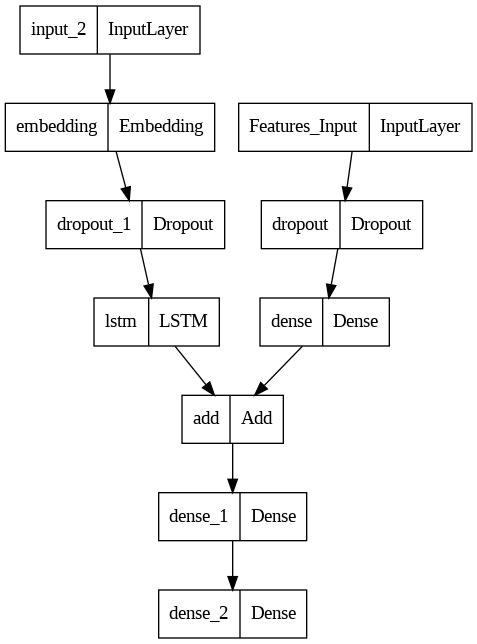

In [73]:
plot_model(caption_model_LSTM)

#### Training the model

In [74]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Defining early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.6)

# Learning Rate Scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

history_LSTM = caption_model_LSTM.fit(train_data_generator, steps_per_epoch=len(train_captions) // batch_size_train,
                        validation_data=val_data_generator, validation_steps=len(val_captions) // batch_size_val,
                        epochs=100, callbacks=[early_stopping, lr_schedule])

Epoch 1/100
22/22 [==============================] - 27s 811ms/step - loss: 8.2238 - val_loss: 3.0060 - lr: 0.0055
Epoch 2/100
22/22 [==============================] - 17s 769ms/step - loss: 2.1825 - val_loss: 1.6606 - lr: 0.0030
Epoch 3/100
22/22 [==============================] - 15s 683ms/step - loss: 1.2134 - val_loss: 1.0261 - lr: 0.0017
Epoch 4/100
22/22 [==============================] - 14s 664ms/step - loss: 0.7815 - val_loss: 0.8272 - lr: 9.0718e-04
Epoch 5/100
22/22 [==============================] - 15s 700ms/step - loss: 0.6189 - val_loss: 0.7440 - lr: 4.9787e-04
Epoch 6/100
22/22 [==============================] - 15s 674ms/step - loss: 0.5426 - val_loss: 0.6681 - lr: 2.7324e-04
Epoch 7/100
22/22 [==============================] - 15s 677ms/step - loss: 0.5220 - val_loss: 0.6402 - lr: 1.4996e-04
Epoch 8/100
22/22 [==============================] - 14s 664ms/step - loss: 0.5039 - val_loss: 0.6648 - lr: 8.2297e-05
Epoch 9/100
22/22 [==============================] - 14s 666

In [ ]:
# save the model
caption_model_LSTM.save('content/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
files.download('content/best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualizing the model performance

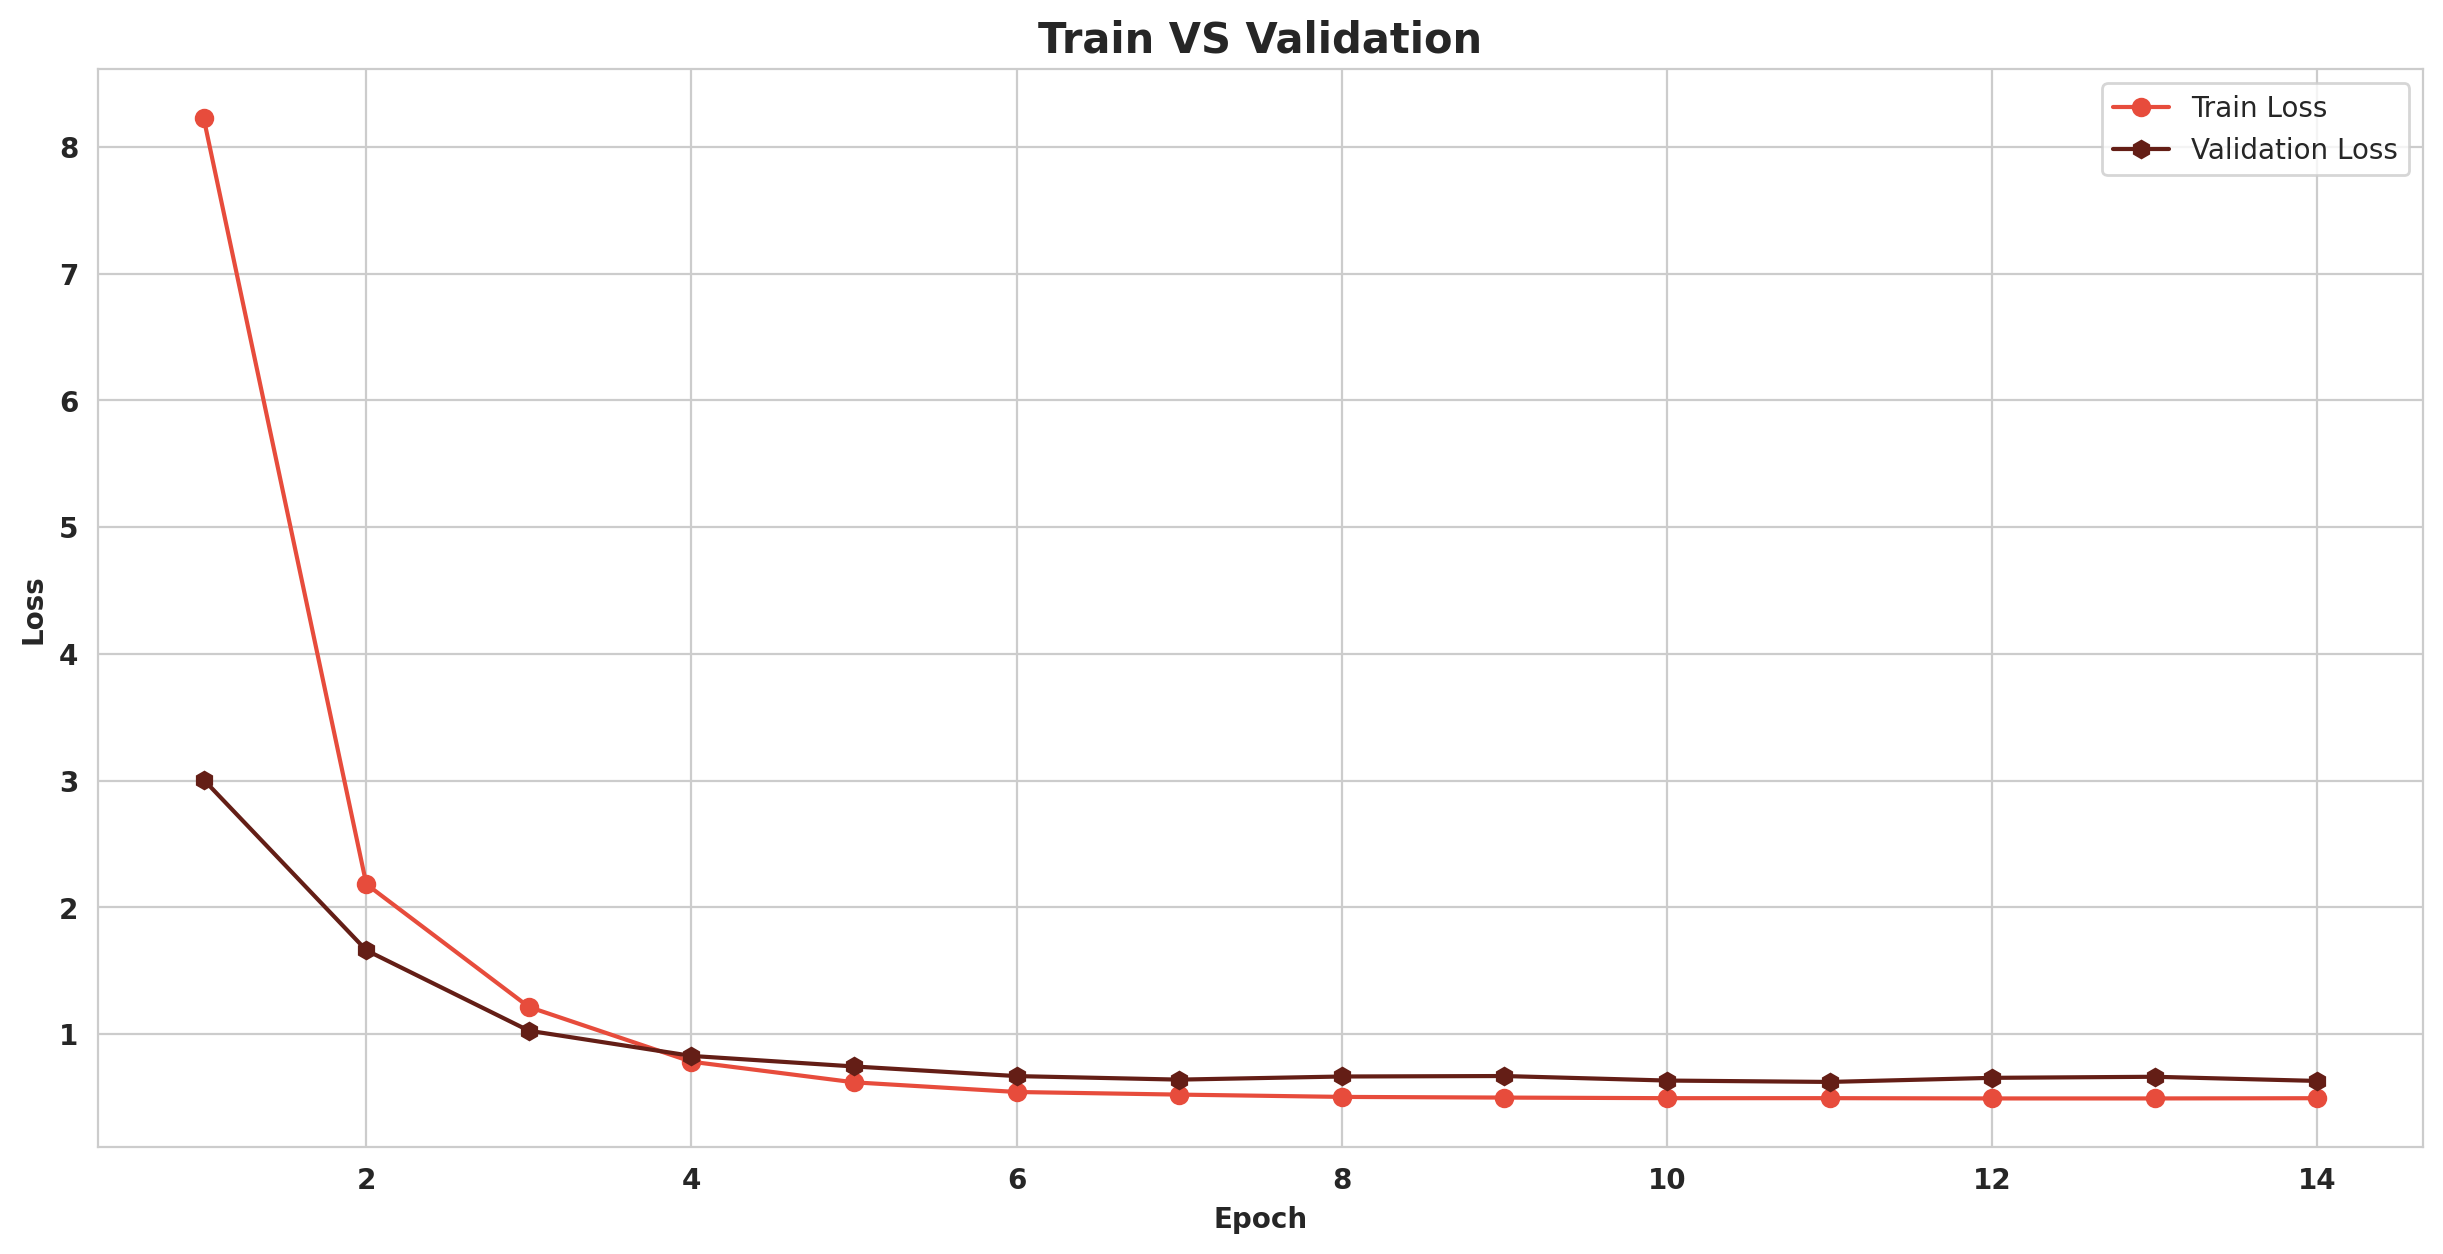

In [75]:
plt.figure(figsize=(15, 7), dpi=200)
sns.set_style('whitegrid')
plt.plot([x+1 for x in range(len(history_LSTM.history['loss']))], history_LSTM.history['loss'], color='#E74C3C', marker='o')
plt.plot([x+1 for x in range(len(history_LSTM.history['loss']))], history_LSTM.history['val_loss'], color='#641E16', marker='h')
plt.title('Train VS Validation', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

### Defining the Image Captioning Model BiGRU

Encoder (image features)
* Input Layer
* Batch Normalization Layer
* Dense Layer
* Batch Normalization Layer

Decoder (captions)
* Input Layer
* Embedding Layer
* LSTM Layer

Output
* Add Layer (Encoder output + Decoder output)
* Dense Layer + ReLU activation function
* Dense Layer + Softmax activation function

In [ ]:
# from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
# from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# def build_model(vocab_size, max_caption_length, cnn_output_dim):
#     # Encoder Model
#     input_image = Input(shape=(cnn_output_dim,), name='Features_Input')
#     fe1 = Dropout(0.4)(input_image)
#     fe2 = Dense(256, activation='relu')(fe1) # Adding a Dense layer to the CNN output to match the decoder output size
#     fe3 = Dropout(0.4)(fe2)

#     # Decoder Model
#     input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')
#     se1 = Embedding(vocab_size, 256, mask_zero=True)(input_caption)
#     se2 = LSTM(256)(se1)

#     # Output
#     decoder1 = add([fe3, se2])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)

#     # Returning The Model
#     model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
#     return model

# # Building the model
# caption_model = build_model(vocab_size, max_caption_length, cnn_output_dim)

# optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
# caption_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# caption_model.summary()

In [76]:
cnn_output_dim_concatenate = cnn_output_dim_VGG16+cnn_output_dim_Resnet+cnn_output_dim_Yolo
cnn_output_dim_concatenate

8192

In [ ]:
# from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
# from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# def build_model(vocab_size, max_caption_length, cnn_output_dim):
#     # Encoder Model
#     inputs1 = Input(shape=(cnn_output_dim_concatenate,), name='Features_Input')
#     fe1 = Dropout(0.4)(inputs1)
#     fe2 = Dense(256, activation='relu')(fe1)
#     # sequence feature layers
#     inputs2 = Input(shape=(max_caption_length,))
#     se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
#     se2 = Dropout(0.4)(se1)
#     se3 = LSTM(256)(se2)

#     # decoder model
#     decoder1 = add([fe2, se3])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(vocab_size, activation='softmax')(decoder2)

#     # Returning The Model
#     model = Model(inputs=[inputs1, inputs2], outputs=outputs)
#     return model

# # Building the model
# caption_model_LSTM = build_model(vocab_size, max_caption_length, cnn_output_dim_concatenate)

# optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
# caption_model_LSTM.compile(loss='categorical_crossentropy', optimizer=optimizer)

# caption_model_LSTM.summary()

In [77]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, Bidirectional, GRU, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

def build_model(vocab_size, max_caption_length, cnn_output_dim):
    # Encoder Model
    input_image = Input(shape=(cnn_output_dim,), name='Features_Input')
    fe2 = Dense(128, activation='relu')(input_image)  # Reduced Dense layer size
    fe3 = Dropout(0.4)(fe2)  # Adding dropout for regularization

    # Decoder Model
    input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')
    se1 = Embedding(vocab_size, 128, mask_zero=True)(input_caption)  # Reduced embedding dimension
    se2 = Bidirectional(GRU(128))(se1)  # Reduced GRU units

    # Output
    decoder1 = Concatenate()([fe3, se2])
    decoder2 = Dense(128, activation='relu')(decoder1)  # Reduced Dense layer size
    outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)

    # Returning The Model
    model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
    return model

# Building the model
caption_model_BiGRU = build_model(vocab_size, max_caption_length, cnn_output_dim_concatenate)

optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
caption_model_BiGRU.compile(loss='categorical_crossentropy', optimizer=optimizer)

caption_model_BiGRU.summary()

Model: "Image_Captioning"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 Sequence_Input (InputLayer  [(None, 11)]                 0         []                            
 )                                                                                                
                                                                                                  
 dense_3 (Dense)             (None, 128)                  1048704   ['Features_Input[0][0]']      
                                                                                   

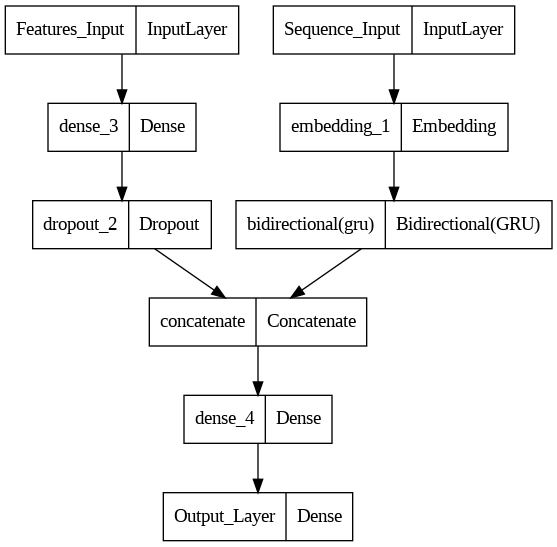

In [78]:
plot_model(caption_model_BiGRU)

#### Training the model

In [79]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Defining early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.6)

# Learning Rate Scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

history_BiGRU = caption_model_BiGRU.fit(train_data_generator, steps_per_epoch=len(train_captions) // batch_size_train,
                        validation_data=val_data_generator, validation_steps=len(val_captions) // batch_size_val,
                        epochs=100, callbacks=[early_stopping, lr_schedule])

Epoch 1/100
22/22 [==============================] - 28s 842ms/step - loss: 4.8204 - val_loss: 2.8695 - lr: 0.0055
Epoch 2/100
22/22 [==============================] - 17s 785ms/step - loss: 2.5472 - val_loss: 1.9243 - lr: 0.0030
Epoch 3/100
22/22 [==============================] - 15s 686ms/step - loss: 1.7969 - val_loss: 1.4241 - lr: 0.0017
Epoch 4/100
22/22 [==============================] - 15s 703ms/step - loss: 1.4351 - val_loss: 1.1427 - lr: 9.0718e-04
Epoch 5/100
22/22 [==============================] - 15s 683ms/step - loss: 1.2723 - val_loss: 1.0365 - lr: 4.9787e-04
Epoch 6/100
22/22 [==============================] - 15s 687ms/step - loss: 1.1851 - val_loss: 1.0336 - lr: 2.7324e-04
Epoch 7/100
22/22 [==============================] - 17s 786ms/step - loss: 1.1456 - val_loss: 1.0146 - lr: 1.4996e-04
Epoch 8/100
22/22 [==============================] - 15s 699ms/step - loss: 1.1268 - val_loss: 0.9593 - lr: 8.2297e-05
Epoch 9/100
22/22 [==============================] - 15s 684

In [ ]:
# save the model
caption_model_BiGRU.save('content/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
files.download('content/best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualizing the model performance

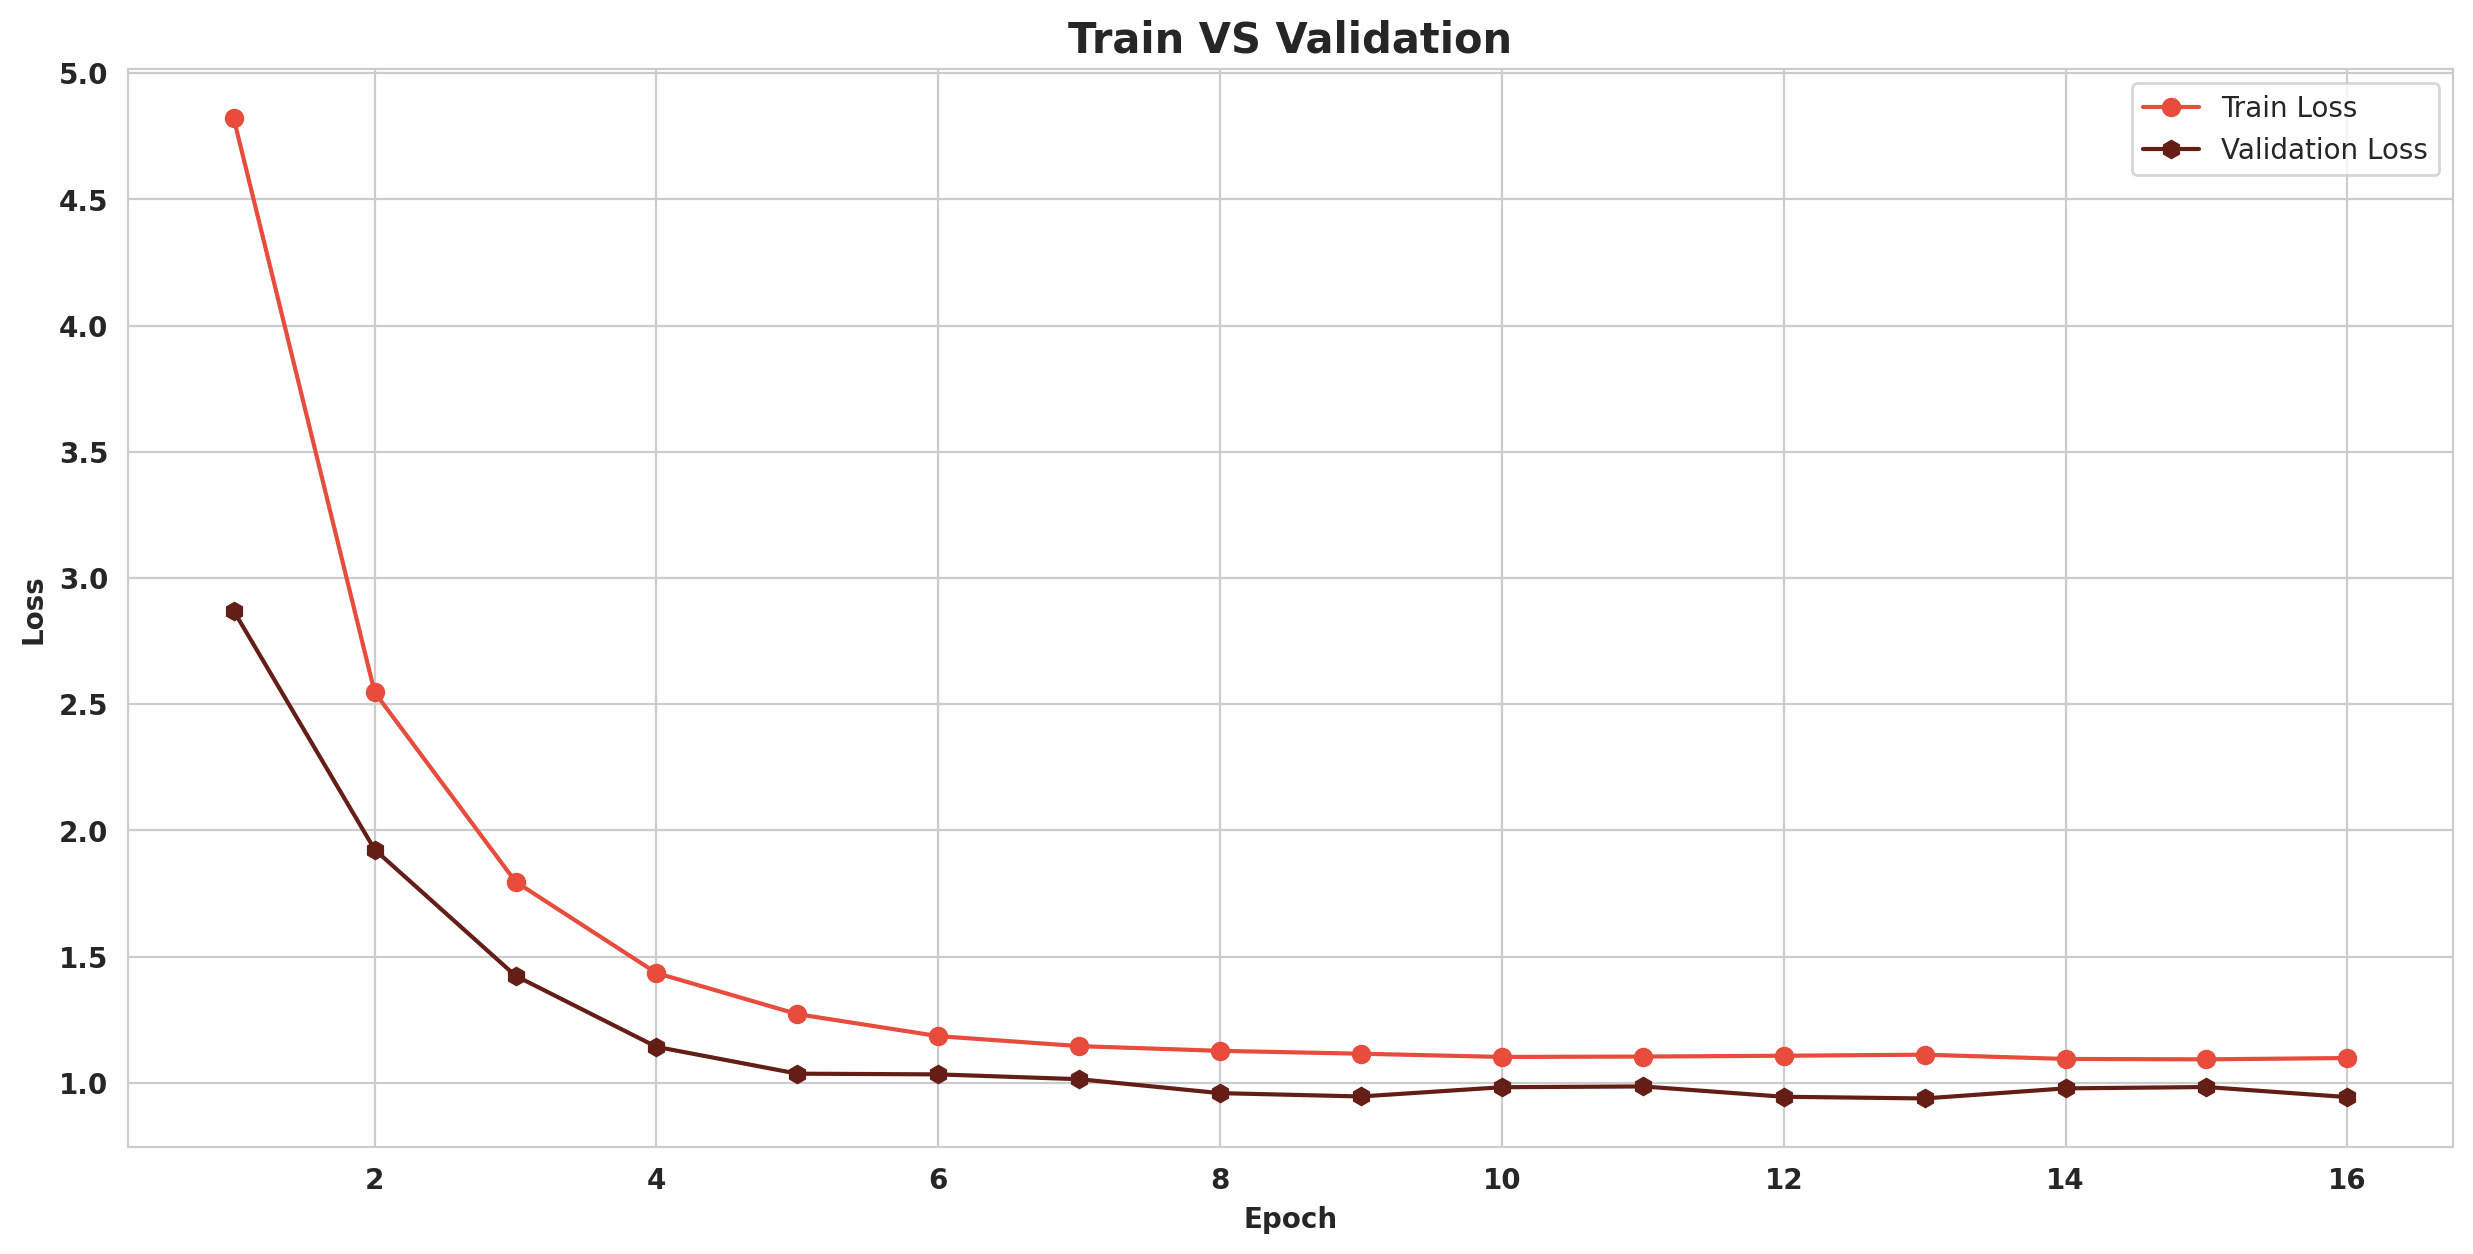

In [80]:
plt.figure(figsize=(15, 7), dpi=200)
sns.set_style('whitegrid')
plt.plot([x+1 for x in range(len(history_BiGRU.history['loss']))], history_BiGRU.history['loss'], color='#E74C3C', marker='o')
plt.plot([x+1 for x in range(len(history_BiGRU.history['loss']))], history_BiGRU.history['val_loss'], color='#641E16', marker='h')
plt.title('Train VS Validation', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

## Evaluasi

### Setup

In [81]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [82]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'start'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length).reshape((1,max_length))
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        idx = np.argmax(yhat)
        # convert index to word
        word = tokenizer.index_word[idx]
        # Adding the predicted word to the sequence
        in_text += ' ' + word
        # stop if word not found
        if word == 'end':
            break

    in_text = in_text.replace('start ', '')
    in_text = in_text.replace(' end', '')

    return in_text

In [83]:
# generate caption for an image
def predict_caption2(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'start'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length).reshape((1,max_length))
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        idx = np.argmax(yhat)
        # convert index to word
        word = tokenizer.index_word[idx]
        # Adding the predicted word to the sequence
        in_text += ' ' + word
        # stop if word not found
        if word == 'end':
            break

    # in_text = in_text.replace('start ', '')
    # in_text = in_text.replace(' end', '')

    return in_text

In [84]:
# def greedy_generator(image_features): # A function to generate captions
#     # Each caption is started with the word 'start'
#     in_text = 'start '
#     for _ in range(max_caption_length):
#         sequence = tokenizer.texts_to_sequences([in_text])[0]
#         sequence = pad_sequences([sequence], maxlen=max_caption_length).reshape((1,max_caption_length))
#         prediction = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)
#         idx = np.argmax(prediction)
#         word = tokenizer.index_word[idx]
#         # Adding the predicted word to the sequence
#         in_text += ' ' + word
#         # When the model returns the word 'end' (which is the end word), the generating loop must be stopped
#         if word == 'end':
#             break

#     in_text = in_text.replace('start ', '')
#     in_text = in_text.replace(' end', '')

#     return in_text

In [85]:
# Defining the maximum length of captions
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

max_length = max_caption_length
max_length

11

In [86]:
type(test_captions)

list

In [87]:
image_id_test = []
Captions_test = []

for caption in test_captions:
    image_id, caption = caption.split('\t')
    image_id_test.append(image_id)
    Captions_test.append(caption)

print(len(image_id_test))
print(len(Captions_test))

1000
1000


In [88]:
image_id_test_unique = list(set(image_id_test))
print(len(image_id_test_unique))

200


In [89]:
image_id_test_unique[:10]

['redsig57.jpg',
 'poundtwenty_21.jpg',
 'ATM_queue6.jpg',
 'eurofive_24.jpg',
 'trash45.jpg',
 'bench49.jpg',
 'greensig52.jpg',
 'poundfifty_14.jpg',
 'music2.jpg',
 'greensig26.jpg']

In [90]:
Captions_test[:10]

['start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end',
 'start green signal please walk end']

In [91]:
import pandas as pd

# Contoh list data
data = {
    'image': image_id_test,
    'caption': Captions_test
}

# Buat dataframe dari list
df_test = pd.DataFrame(data)

# Tampilkan dataframe
# df_test

In [92]:
len(df_test['caption'])

1000

In [93]:
df_test['caption']

0      start green signal please walk end
1      start green signal please walk end
2      start green signal please walk end
3      start green signal please walk end
4      start green signal please walk end
                      ...                
995           start kids playing park end
996           start kids running park end
997         start kids running garden end
998     start group kids running park end
999     start group kids playing park end
Name: caption, Length: 1000, dtype: object

In [94]:
# len(test_image_featuresVgg16)

In [95]:
len(image_id_test_unique)

200

In [96]:
# import numpy as np

# # Misalkan test_image_features adalah dictionary Anda
# # Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
# key_example = next(iter(test_image_featuresVgg16))

# # Mendapatkan nilai array dari dictionary menggunakan kunci
# value_array = test_image_featuresVgg16[key_example]

# # Mengecek bentuk (shape) dari array
# array_shape = np.array(value_array).shape

# print("Bentuk array:", array_shape)

In [97]:
image_id_test = []
Captions_test = []

for caption in test_captions:
    image_id, caption = caption.split('\t')
    image_id_test.append(image_id)
    Captions_test.append(caption)

print(len(image_id_test))
print(len(Captions_test))

1000
1000


In [98]:
image_id_test_unique = list(set(image_id_test))
print(len(image_id_test_unique))

200


In [99]:
# from tqdm import tqdm_notebook

# test_image_features_reshape = test_image_features
# # Ubah bentuk test_image_features
# for key in tqdm_notebook(image_id_test_unique):
#     test_image_features_reshape[key] = test_image_features_reshape[key].reshape(1, -1)

In [100]:
# import numpy as np

# # Misalkan test_image_features adalah dictionary Anda
# # Contoh untuk mendapatkan salah satu kunci (key) dari dictionary
# key_example = next(iter(test_image_features_reshape))

# # Mendapatkan nilai array dari dictionary menggunakan kunci
# value_array = test_image_features_reshape[key_example]

# # Mengecek bentuk (shape) dari array
# array_shape = np.array(value_array).shape

# print("Bentuk array:", array_shape)

In [101]:
# A dictionary to access actual captions of each image by its ID
test_actual_captions = {}
for item in test_captions:
    image_id, caption = item.split('\t')
    if image_id not in test_actual_captions:
        test_actual_captions[image_id] = []
    test_actual_captions[image_id].append(caption)

In [102]:
# Membuat dictionary baru untuk menyimpan teks tanpa token "start" dan "end"
test_actual_captions2 = {}

# Iterasi melalui setiap kunci (nama file) dan nilai (list teks) dalam dictionary
for filename, captions in test_actual_captions.items():
    # Menghapus token "start" dan "end" dari setiap teks
    clean_captions = [caption.replace('start', '').replace('end', '').strip() for caption in captions]
    # Menyimpan teks yang sudah dimodifikasi ke dalam dictionary baru
    test_actual_captions2[filename] = clean_captions

# Menampilkan dictionary baru yang telah dimodifikasi
print(test_actual_captions2)

{'greensig15.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig21.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig26.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig29.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig38.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig37.jpg': ['green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk', 'green signal please walk'], 'greensig46.jpg': ['green signal please

In [103]:
from tqdm.notebook import tqdm

from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

JumlahBiGru = 0
JumlahLSTM = 0

for key in tqdm(test_actual_captions2):
    actual_s, predictedLSTM_s, predictedBiGRU_s = list(), list(), list()
    # get actual caption
    captions = test_actual_captions2[key]
    # captions = [x.replace("start ", "") for x in captions] # Removing the start token
    # captions = [x.replace(" end", "") for x in captions] # Removing the end token

    # Predict the caption for image using LSTM model
    y_pred_lstm = predict_caption2(caption_model_LSTM, test_image_concatenate[key], tokenizer, max_caption_length)
    # Predict the caption for image using BiGRU model
    y_pred_bigru = predict_caption2(caption_model_BiGRU, test_image_concatenate[key], tokenizer, max_caption_length)

    # split into words
    actual_captions = [caption.split() for caption in captions]

    # Split predicted captions into words
    y_pred_lstm = y_pred_lstm.split()
    y_pred_bigru = y_pred_bigru.split()

    # append to the list
    actual_s.append(actual_captions)

    predictedLSTM_s.append(y_pred_lstm)
    predictedBiGRU_s.append(y_pred_bigru)

    # Calculate BLEU scores for both LSTM and BiGRU predictions
    bleu_score_lstm = corpus_bleu(actual_s, predictedLSTM_s, weights=(0.25, 0.25, 0.25, 0.25))
    bleu_score_bigru = corpus_bleu(actual_s, predictedBiGRU_s, weights=(0.25, 0.25, 0.25, 0.25))

    print(f"\n")
    print(f"LSTM: {bleu_score_lstm}")
    print(f"BiGRU: {bleu_score_bigru}")

    # Choose the caption with the higher BLEU score
    if bleu_score_lstm >= bleu_score_bigru:
        y_pred = y_pred_lstm
        print(f"Terpilih LSTM: {bleu_score_lstm}")
        JumlahLSTM += 1
        print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
        print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")
    else:
        y_pred = y_pred_bigru
        print(f"Terpilih BiGRU: {bleu_score_bigru}")
        JumlahBiGru += 1
        print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
        print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")

    # Append actual and predicted captions to the lists
    actual.append(actual_captions)
    predicted.append(y_pred)

  0%|          | 0/200 [00:00<?, ?it/s]



LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 1
Jumlah BiGRU Terpilih: 0


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()





LSTM: 0.5081327481546147
BiGRU: 1.384292958842266e-231
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 2
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 1.384292958842266e-231
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 3
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 1.384292958842266e-231
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 4
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 5.775353993361614e-78
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 5
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 1.384292958842266e-231
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 6
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 7
Jumlah BiGRU Terpilih: 0


LSTM: 0
BiGRU: 1.1200407237786664e-231
Terpilih BiGRU: 1.1200407237786664e-231
Jumlah LSTM Terpilih: 7
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0

In [104]:
max_caption_length

11

In [105]:
print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")

Jumlah LSTM Terpilih: 163
Jumlah BiGRU Terpilih: 37


### BLEU

In [132]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for the hybrid model predictions
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.586618
BLEU-2: 0.529595
BLEU-3: 0.459850
BLEU-4: 0.357031


### Meteor

In [107]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [108]:
from nltk.translate.meteor_score import meteor_score

# Hitung METEOR untuk semua pasangan actual dan predicted captions
meteor_scores = [meteor_score(actual[i], predicted[i]) for i in range(len(actual))]

# Rata-rata skor METEOR
average_meteor_score = sum(meteor_scores) / len(meteor_scores)
print("Average METEOR Score:", average_meteor_score)

Average METEOR Score: 0.8309283190438813


### Rouge

In [109]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=00f4cc2e8203251f4021c330df9cc4faa238f962352bf76e930bcf9c0ea47a22
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [110]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Hitung ROUGE untuk semua pasangan actual dan predicted captions
rouge1_scores = []
rougeL_scores = []

for i in range(len(actual)):
    scores = scorer.score(' '.join(actual[i][0]), ' '.join(predicted[i]))
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Rata-rata skor ROUGE
average_rouge1_score = sum(rouge1_scores) / len(rouge1_scores)
average_rougeL_score = sum(rougeL_scores) / len(rougeL_scores)

print("Average ROUGE-1 Score:", average_rouge1_score)
print("Average ROUGE-L Score:", average_rougeL_score)

Average ROUGE-1 Score: 0.603491718807509
Average ROUGE-L Score: 0.5953977017134918


### CIDer

In [116]:
pip install pycocoevalcap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 2.3 MB/s eta 0:00:00


In [130]:
# Format data sesuai dengan format yang diharapkan oleh CIDEr
gts = {}
res = {}

for i in range(len(actual)):
    gts[str(i)] = [' '.join(caption) for caption in actual[i]]  # ground truth captions
    res[str(i)] = [' '.join(predicted[i])]  # predicted captions

# Inisialisasi objek Cider
cider_scorer = Cider()

# Hitung skor CIDEr
score, scores = cider_scorer.compute_score(gts, res)

# Cetak hasil
print("CIDEr Score:", score)

CIDEr Score: 2.3950575303427235


## Inference

In [ ]:
def greedy_generator(image_features): # A function to generate captions
    # Each caption is started with the word 'start'
    in_text = 'start '
    for _ in range(max_caption_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_caption_length).reshape((1,max_caption_length))
        prediction = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)
        idx = np.argmax(prediction)
        word = tokenizer.index_word[idx]
        # Adding the predicted word to the sequence
        in_text += ' ' + word
        # When the model returns the word 'end' (which is the end word), the generating loop must be stopped
        if word == 'end':
            break

    in_text = in_text.replace('start ', '')
    in_text = in_text.replace(' end', '')

    return in_text

In [ ]:
def beam_search_generator(image_features, K_beams = 3, log = False):
    start = [tokenizer.word_index['start']]

    start_word = [[start, 0.0]]

    for _ in range(max_caption_length):
        temp = []
        for s in start_word:
            # Sequence of most probable words based on the previous steps
            sequence  = pad_sequences([s[0]], maxlen=max_caption_length).reshape((1,max_caption_length))

            preds = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)

            # Sorting predictions by the probability and taking the last K_beams items.
            word_preds = np.argsort(preds[0])[-K_beams:]

            # Getting the top <K_beams>(n) predictions and creating a
            #                              new list so as to put them via the model again.
            for w in word_preds:

                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                if log:
                    prob += np.log(preds[0][w]) # assign a probability to each K words
                else:
                    prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])

        # Getting the top words
        start_word = start_word[-K_beams:]

    start_word = start_word[-1][0]
    captions_ = [tokenizer.index_word[i] for i in start_word]

    final_caption = []

    for i in captions_:
        if i != 'end':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [ ]:
# Calculates BLEU score of predictions
def BLEU_score(actual, greedy, beam_search):
    # Calculating the BLEU score by comparing the predicted caption with five actual captions.
    score_greedy_1 = corpus_bleu(actual, greedy, weights=(0.3, 0.3, 0.3, 0))
    score_greedy_2 = corpus_bleu(actual, greedy, weights=(0.25, 0.25, 0.25, 0.25))
    score_BS_1 = corpus_bleu(actual, beam_search, weights=(0.3, 0.3, 0.3, 0))
    score_BS_2 = corpus_bleu(actual, beam_search, weights=(0.25, 0.25, 0.25, 0.25))

    return [
        (f'BLEU-2 Greedy: {round(score_BS_2, 5)}'),
        (f'BLEU-1 Greedy: {round(score_BS_1, 5)}'),
        (f'Greedy: {greedy[0]}'),
        (f'BLEU-2 Beam Search: {round(score_greedy_2, 5)}'),
        (f'BLEU-1 Beam Search: {round(score_greedy_1, 5)}'),
        (f'Beam Search:  {beam_search[0]}')
    ]

In [ ]:
# Generating captions
generated_captions = {}

pbar = tqdm_notebook(total=len(test_image_features), position=0, leave=True, colour='green')
for image_id in test_image_features:
    cap = greedy_generator(test_image_features[image_id])
    generated_captions[image_id] = cap
    pbar.update(1)

pbar.close()

<ipython-input-108-aec4444fb175>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1012 [00:00<?, ?it/s]

KeyboardInterrupt: 

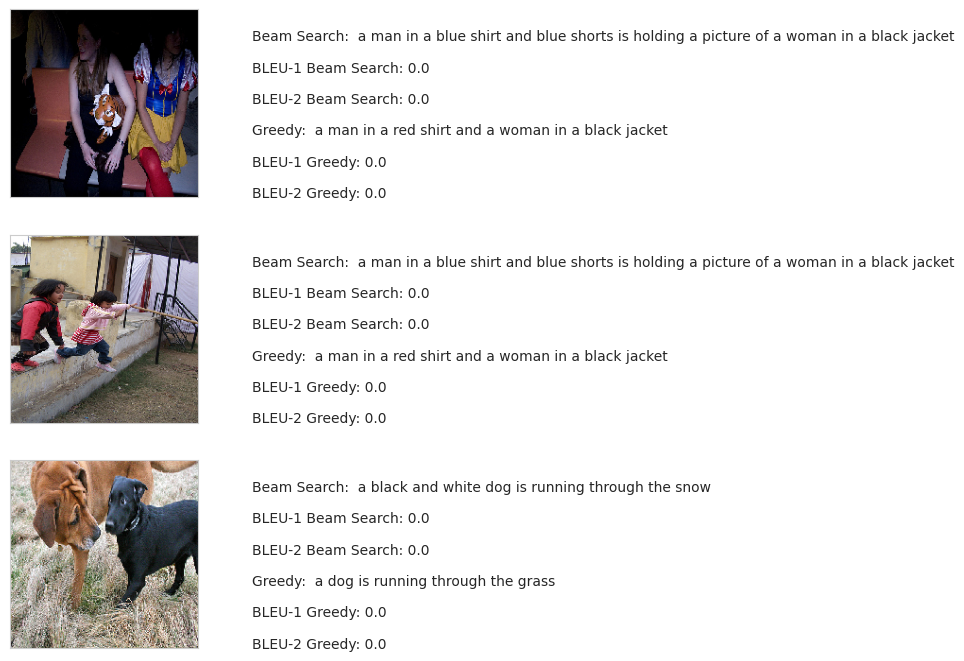

In [ ]:
def visualization(data, greedy_caps, beamS_generator, evaluator, num_of_images):
    keys = list(data.keys()) # List of all test images
    images = [np.random.choice(keys) for i in range(num_of_images)] # Randomly selected images

    count = 1
    fig = plt.figure(figsize=(6,20))
    for filename in images:
        actual_cap = data[filename]
        actual_cap = [x.replace("start ", "") for x in actual_cap] # Removing the start token
        actual_cap = [x.replace(" end", "") for x in actual_cap] # Removing the end token

        # Generating captions
        greedy_cap = greedy_caps[filename]
        beamS_cap = beamS_generator(test_image_features[filename])

        # Getting the bleu score
        caps_with_score = evaluator(actual_cap, [greedy_cap]*(len(actual_cap)), [beamS_cap]*(len(actual_cap)))

        image_load = load_img(images_directory+filename, target_size=(199,199,3))
        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(caps_with_score))
        for i, text in enumerate(caps_with_score):
            ax.text(0,i,text,fontsize=10)
        count += 1
    plt.show()

visualization(test_actual_captions, generated_captions, beam_search_generator, BLEU_score, 7)

# Fine Tuning

## CheckPoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pickle

pickle_dir = "/content/drive/MyDrive"

################## Vgg16 ##################
# load features from pickle
with open(os.path.join(pickle_dir, 'FKtrain_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
    train_image_featuresVgg16 = pickle.load(f)

# load features from pickle
with open(os.path.join(pickle_dir, 'FKval_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
    val_image_featuresVgg16 = pickle.load(f)

with open(os.path.join(pickle_dir, 'FKtest_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
    test_image_featuresVgg16 = pickle.load(f)

####################### Restnet #######################
# load features from pickle
with open(os.path.join(pickle_dir, 'FKtrain_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
    train_image_featuresResnet = pickle.load(f)

# load features from pickle
with open(os.path.join(pickle_dir, 'FKval_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
    val_image_featuresResnet = pickle.load(f)

with open(os.path.join(pickle_dir, 'FKtest_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
    test_image_featuresResnet = pickle.load(f)

####################### Yolov4 #######################
# load features from pickle
with open(os.path.join(pickle_dir, 'FKtrain_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
    train_image_featuresYolo = pickle.load(f)

# load features from pickle
with open(os.path.join(pickle_dir, 'FKval_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
    val_image_featuresYolo = pickle.load(f)

with open(os.path.join(pickle_dir, 'FKtest_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
    test_image_featuresYolo = pickle.load(f)

####################### Model #######################
# load features from pickle
# with open(os.path.join(pickle_dir, 'modelBagus_image_captioning.pkl'), 'rb') as f:
#     caption_model = pickle.load(f)

In [ ]:
# print(f"Visual Assistence VGG 16 : {len(train_image_features)}")

# print(f"Visual Assistence Resnet 50 : {len(val_image_features)}")

# print(f"Visual Assistence VGG 16 : {len(test_image_features)}")


Visual Assistence VGG 16 : 1200
Visual Assistence Resnet 50 : 200
Visual Assistence VGG 16 : 200


In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
Fk_caption_model_LSTM = load_model('/content/drive/MyDrive/FKLSTM_Concat_modelAUG.h5')

# Menampilkan ringkasan dari model
Fk_caption_model_LSTM.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 embedding (Embedding)       (None, 34, 256)              2198016   ['input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 8192)                 0         ['Features_Input[0][0]']  

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
Fk_caption_model_BiGRU = load_model('/content/drive/MyDrive/FKGRU_Concat_modelAUG.h5')

# Menampilkan ringkasan dari model
Fk_caption_model_BiGRU.summary()


Model: "Image_Captioning"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 Sequence_Input (InputLayer  [(None, 34)]                 0         []                            
 )                                                                                                
                                                                                                  
 dense (Dense)               (None, 128)                  1048704   ['Features_Input[0][0]']      
                                                                                   

## Fine Tuning LSTM

In [ ]:
# Layers in loaded model
Fk_caption_model_LSTM.layers

In [ ]:
for layer in Fk_caption_model_LSTM.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True


In [ ]:
Fk_caption_model_LSTM.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 embedding (Embedding)       (None, 34, 256)              2198016   ['input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 8192)                 0         ['Features_Input[0][0]']  

In [ ]:
# Check which layers are tuneable (trainable) in base model
for layer_number, layer in enumerate(Fk_caption_model_LSTM.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 True
1 Features_Input True
2 embedding True
3 dropout True
4 dropout_1 True
5 dense True
6 lstm True
7 add True
8 dense_1 True
9 dense_2 True


In [ ]:
Fk_caption_model_LSTM.trainable = True

# Freeze all layers except for the
for layer in Fk_caption_model_LSTM.layers[0:8]:
  layer.trainable = True

# Recompile the model (always recompile after any adjustments to a model)
Fk_caption_model_LSTM.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001)) # lr is 10x lower than before for fine-tuning


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(Fk_caption_model_LSTM.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 True
1 Features_Input True
2 embedding True
3 dropout True
4 dropout_1 True
5 dense True
6 lstm True
7 add True
8 dense_1 True
9 dense_2 True


In [ ]:
# A dictionary to access actual captions of each image by its ID
train_actual_captions = {}
for item in train_captions:
    image_id, caption = item.split('\t')
    if image_id not in train_actual_captions:
        train_actual_captions[image_id] = []
    train_actual_captions[image_id].append(caption)

In [ ]:
# A dictionary to access actual captions of each image by its ID
val_actual_captions = {}
for item in val_captions:
    image_id, caption = item.split('\t')
    if image_id not in val_actual_captions:
        val_actual_captions[image_id] = []
    val_actual_captions[image_id].append(caption)

In [ ]:
# Defining the maximum length of captions
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

max_length = max_caption_length
max_length

11

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

# Defining batch size
batch_size_train = 270
batch_size_val = 150

# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]  # Sebelumnya, ini membuat masukan menjadi 1D
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

# Defining the maximum length of captions
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

trainVA_data_generator = data_generator(train_actual_captions, train_actual_captions, train_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_train)
valVA_data_generator = data_generator(val_actual_captions, val_actual_captions, val_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_val)

In [ ]:
# train_actual_captions[:10]

In [ ]:
cnn_output_dim_concatenate = cnn_output_dim_VGG16+cnn_output_dim_Resnet+cnn_output_dim_Yolo
cnn_output_dim_concatenate

8192

In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, Bidirectional, GRU, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras

def fine_tune_model(caption_model_LSTM, train_generator, val_generator, vocabulary_size, epochs=10, steps_per_epoch=100, validation_steps=50):

    # Define the input layers
    visual_input = Input(shape=(cnn_output_dim_concatenate,), name='Features_Input')
    embedding_input = Input(shape=(None,), name='text_input')

    # Define the embedding layer
    embedding_layer = caption_model_LSTM.get_layer('embedding')(embedding_input)

    # Define the LSTM layer
    lstm_layer = caption_model_LSTM.get_layer('lstm')(embedding_layer)

    # Concatenate the visual and text features
    concatenated = keras.layers.concatenate([visual_input, lstm_layer])

    # Add more layers for fine-tuning
    dense1 = Dense(512, activation='relu')(concatenated)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(256, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    output = Dense(vocabulary_size, activation='softmax')(dropout2)

    # Combine the input and output
    fine_tuned_modelLSTM = Model(inputs=[visual_input, embedding_input], outputs=output)

    # Freeze layers from the pre-trained model
    for layer in fine_tuned_modelLSTM.layers[:3]:
        layer.trainable = False

    # Compile the model
    fine_tuned_modelLSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Print model summary
    fine_tuned_modelLSTM.summary()

    # Define checkpoint to save the best model during training
    # checkpoint = ModelCheckpoint('fine_tuned_modelLSTM.h5', save_best_only=True)

    # Defining early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    def lr_scheduler(epoch, lr):
        return lr * tf.math.exp(-0.6)

    # Train the model
    fine_tuned_modelLSTM.fit(train_generator,
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         validation_data=val_generator,
                         validation_steps=validation_steps,
                         callbacks=[early_stopping, lr_schedule])
    return fine_tuned_modelLSTM

# Example usage:
# fine_tuned_modelLSTM = fine_tune_model(caption_model_L



In [ ]:
# Vocab size Flickr8k
vocab_size = 8585 + 1
vocab_size

8586

### Training Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Defining early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.6)

# Learning Rate Scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

fine_tuned_modelLSTM = fine_tune_model(caption_model_LSTM, trainVA_data_generator, valVA_data_generator, vocab_size, epochs=100)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       multiple                     2198016   ['text_input[0][0]']          
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 lstm (LSTM)                 (None, 256)                  525312    ['embedding[1][0]']     

In [ ]:
# save the model
fine_tuned_modelLSTM.save('content/FineTuned_LSTM_Concat_modelAUG(1).h5')

In [ ]:
files.download('content/FineTuned_LSTM_Concat_modelAUG(1).h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Fine Tuning BiGRU

In [ ]:
# Layers in loaded model
Fk_caption_model_BiGRU.layers

In [ ]:
for layer in Fk_caption_model_BiGRU.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True


In [ ]:
Fk_caption_model_BiGRU.summary()

Model: "Image_Captioning"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 Sequence_Input (InputLayer  [(None, 34)]                 0         []                            
 )                                                                                                
                                                                                                  
 dense (Dense)               (None, 128)                  1048704   ['Features_Input[0][0]']      
                                                                                   

In [ ]:
# Check which layers are tuneable (trainable) in base model
for layer_number, layer in enumerate(Fk_caption_model_BiGRU.layers):
  print(layer_number, layer.name, layer.trainable)

0 Features_Input True
1 Sequence_Input True
2 dense True
3 embedding True
4 dropout True
5 bidirectional True
6 concatenate True
7 dense_1 True
8 Output_Layer True


In [ ]:
Fk_caption_model_BiGRU.trainable = True

# Freeze all layers except for the
for layer in Fk_caption_model_BiGRU.layers[0:8]:
  layer.trainable = True

# Recompile the model (always recompile after any adjustments to a model)
Fk_caption_model_BiGRU.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001)) # lr is 10x lower than before for fine-tuning


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(Fk_caption_model_BiGRU.layers):
  print(layer_number, layer.name, layer.trainable)

0 Features_Input True
1 Sequence_Input True
2 dense True
3 embedding True
4 dropout True
5 bidirectional True
6 concatenate True
7 dense_1 True
8 Output_Layer True


In [ ]:
# A dictionary to access actual captions of each image by its ID
train_actual_captions = {}
for item in train_captions:
    image_id, caption = item.split('\t')
    if image_id not in train_actual_captions:
        train_actual_captions[image_id] = []
    train_actual_captions[image_id].append(caption)

In [ ]:
# A dictionary to access actual captions of each image by its ID
val_actual_captions = {}
for item in val_captions:
    image_id, caption = item.split('\t')
    if image_id not in val_actual_captions:
        val_actual_captions[image_id] = []
    val_actual_captions[image_id].append(caption)

In [ ]:
# Defining the maximum length of captions
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

max_length = max_caption_length
max_length

11

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

# Defining batch size
batch_size_train = 270
batch_size_val = 150

# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]  # Sebelumnya, ini membuat masukan menjadi 1D
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

# Defining the maximum length of captions
max_caption_lengthVA = max(len(caption.split()) for caption in cleaned_captions) + 1

trainVA_data_generator = data_generator(train_actual_captions, train_actual_captions, train_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_train)
valVA_data_generator = data_generator(val_actual_captions, val_actual_captions, val_image_concatenate, tokenizer, max_caption_length, vocab_size, batch_size_val)

In [ ]:
# train_actual_captions[:10]

In [ ]:
cnn_output_dim_concatenate = cnn_output_dim_VGG16+cnn_output_dim_Resnet+cnn_output_dim_Yolo
cnn_output_dim_concatenate

8192

In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, Bidirectional, GRU, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras

def fine_tune_model(caption_model_BiGRU, train_generator, val_generator, vocabulary_size, epochs=10, steps_per_epoch=100, validation_steps=50):

    # Define the input layers
    visual_input = Input(shape=(cnn_output_dim_concatenate,), name='Features_Input')
    embedding_input = Input(shape=(None,), name='text_input')

    # Define the embedding layer
    embedding_layer = caption_model_BiGRU.get_layer('embedding')(embedding_input)

    # Define the LSTM layer
    bigru_layer = caption_model_BiGRU.get_layer('bidirectional')(embedding_layer)

    # Concatenate the visual and text features
    concatenated = keras.layers.concatenate([visual_input, bigru_layer])

    # Add more layers for fine-tuning
    dense1 = Dense(512, activation='relu')(concatenated)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(256, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    output = Dense(vocabulary_size, activation='softmax')(dropout2)

    # Combine the input and output
    fine_tuned_modelBiGRU = Model(inputs=[visual_input, embedding_input], outputs=output)

    # Freeze layers from the pre-trained model
    for layer in fine_tuned_modelBiGRU.layers[:3]:
        layer.trainable = False

    # Compile the model
    fine_tuned_modelBiGRU.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Print model summary
    fine_tuned_modelBiGRU.summary()

    # Define checkpoint to save the best model during training
    # checkpoint = ModelCheckpoint('fine_tuned_modelBiGRU.h5', save_best_only=True)

    # Defining early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    def lr_scheduler(epoch, lr):
        return lr * tf.math.exp(-0.6)

    # Train the model
    fine_tuned_modelBiGRU.fit(train_generator,
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         validation_data=val_generator,
                         validation_steps=validation_steps,
                         callbacks=[early_stopping, lr_schedule])
    return fine_tuned_modelBiGRU

# Example usage:
# fine_tuned_modelBiGRU = fine_tune_model(caption_model_L



### Training Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Defining early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.6)

# Learning Rate Scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

fine_tuned_modelBiGRU = fine_tune_model(Fk_caption_model_BiGRU, trainVA_data_generator, valVA_data_generator, vocab_size, epochs=100)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       multiple                     1099008   ['text_input[0][0]']          
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 bidirectional (Bidirection  (None, 256)                  198144    ['embedding[1][0]']     

In [ ]:
# save the model
fine_tuned_modelBiGRU.save('content/FineTuned_BiGRU_Concat_model(1).h5')

In [ ]:
files.download('content/FineTuned_BiGRU_Concat_model(1).h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## CheckPoint

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import pickle

# pickle_dir = "/content/drive/MyDrive"

# ################## Vgg16 ##################
# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKtrain_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
#     train_image_featuresVgg16 = pickle.load(f)

# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKval_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
#     val_image_featuresVgg16 = pickle.load(f)

# with open(os.path.join(pickle_dir, 'FKtest_image_featuresVgg16AUG(dropout).pkl'), 'rb') as f:
#     test_image_featuresVgg16 = pickle.load(f)

# ####################### Restnet #######################
# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKtrain_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
#     train_image_featuresResnet = pickle.load(f)

# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKval_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
#     val_image_featuresResnet = pickle.load(f)

# with open(os.path.join(pickle_dir, 'FKtest_image_featuresResnetAUG(dropout).pkl'), 'rb') as f:
#     test_image_featuresResnet = pickle.load(f)

# ####################### Yolov4 #######################
# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKtrain_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
#     train_image_featuresYolo = pickle.load(f)

# # load features from pickle
# with open(os.path.join(pickle_dir, 'FKval_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
#     val_image_featuresYolo = pickle.load(f)

# with open(os.path.join(pickle_dir, 'FKtest_image_featuresYoloAUG(dropout).pkl'), 'rb') as f:
#     test_image_featuresYolo = pickle.load(f)

# ####################### Model #######################
# # load features from pickle
# # with open(os.path.join(pickle_dir, 'modelBagus_image_captioning.pkl'), 'rb') as f:
# #     caption_model = pickle.load(f)

In [ ]:
# print(f"Visual Assistence VGG 16 : {len(train_image_features)}")

# print(f"Visual Assistence Resnet 50 : {len(val_image_features)}")

# print(f"Visual Assistence VGG 16 : {len(test_image_features)}")


Visual Assistence VGG 16 : 1200
Visual Assistence Resnet 50 : 200
Visual Assistence VGG 16 : 200


In [145]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
fine_tuned_modelLSTM = load_model('/content/drive/MyDrive/FineTuned_LSTM_Concat_modelV(1).h5')

# Menampilkan ringkasan dari model
fine_tuned_modelLSTM.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 256)            2198016   ['text_input[0][0]']          
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 lstm (LSTM)                 (None, 256)                  525312    ['embedding[0][0]']     

In [146]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
fine_tuned_modelBiGRU = load_model('/content/drive/MyDrive/FineTuned_BiGRU_Concat_modelV(1).h5')

# Menampilkan ringkasan dari model
fine_tuned_modelBiGRU.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 128)            1099008   ['text_input[0][0]']          
                                                                                                  
 Features_Input (InputLayer  [(None, 8192)]               0         []                            
 )                                                                                                
                                                                                                  
 bidirectional (Bidirection  (None, 256)                  198144    ['embedding[0][0]']     

## Evaluasi

### Setup

In [147]:
from tqdm.notebook import tqdm

from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

JumlahBiGru = 0
JumlahLSTM = 0

for key in tqdm(test_actual_captions2):
    actual_s, predictedLSTM_s, predictedBiGRU_s = list(), list(), list()
    # get actual caption
    captions = test_actual_captions2[key]
    # captions = [x.replace("start ", "") for x in captions] # Removing the start token
    # captions = [x.replace(" end", "") for x in captions] # Removing the end token

    # Predict the caption for image using LSTM model
    y_pred_lstm = predict_caption2(fine_tuned_modelLSTM, test_image_concatenate[key], tokenizer, max_caption_length)
    # Predict the caption for image using BiGRU model
    y_pred_bigru = predict_caption2(fine_tuned_modelBiGRU, test_image_concatenate[key], tokenizer, max_caption_length)

    # split into words
    actual_captions = [caption.split() for caption in captions]

    # Split predicted captions into words
    y_pred_lstm = y_pred_lstm.split()
    y_pred_bigru = y_pred_bigru.split()

    # append to the list
    actual_s.append(actual_captions)

    predictedLSTM_s.append(y_pred_lstm)
    predictedBiGRU_s.append(y_pred_bigru)

    # Calculate BLEU scores for both LSTM and BiGRU predictions
    bleu_score_lstm = corpus_bleu(actual_s, predictedLSTM_s, weights=(0.25, 0.25, 0.25, 0.25))
    bleu_score_bigru = corpus_bleu(actual_s, predictedBiGRU_s, weights=(0.25, 0.25, 0.25, 0.25))

    print(f"\n")
    print(f"LSTM: {bleu_score_lstm}")
    print(f"BiGRU: {bleu_score_bigru}")

    # Choose the caption with the higher BLEU score
    if bleu_score_lstm >= bleu_score_bigru:
        y_pred = y_pred_lstm
        print(f"Terpilih LSTM: {bleu_score_lstm}")
        JumlahLSTM += 1
        print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
        print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")
    else:
        y_pred = y_pred_bigru
        print(f"Terpilih BiGRU: {bleu_score_bigru}")
        JumlahBiGru += 1
        print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
        print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")

    # Append actual and predicted captions to the lists
    actual.append(actual_captions)
    predicted.append(y_pred)

  0%|          | 0/200 [00:00<?, ?it/s]



LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 1
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 2
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 3
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 4
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 5
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 6
Jumlah BiGRU Terpilih: 0


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 7
Jumlah BiGRU Terpilih: 0


LSTM: 0
BiGRU: 0
Terpilih LSTM: 0
Jumlah LSTM 

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()





LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 11
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 12
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 13
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 14
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 15
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 16
Jumlah BiGRU Terpilih: 0


LSTM: 6.86809206056511e-78
BiGRU: 6.86809206056511e-78
Terpilih LSTM: 6.86809206056511e-78
Jumlah LSTM Terpilih: 17
Jumlah BiGRU Terpilih: 0

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()





LSTM: 1.384292958842266e-231
BiGRU: 0.5081327481546147
Terpilih BiGRU: 0.5081327481546147
Jumlah LSTM Terpilih: 20
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 21
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 22
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 23
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 24
Jumlah BiGRU Terpilih: 1


LSTM: 0.5081327481546147
BiGRU: 0.5081327481546147
Terpilih LSTM: 0.5081327481546147
Jumlah LSTM Terpilih: 25
Jumlah BiGRU Terpilih: 1


LSTM: 0.6147881529512643
BiGRU: 0.6147881529512643
Terpilih LSTM: 0.6147881529512643
Jumlah LSTM Terpilih: 26
Jumlah BiGRU Terpilih: 1


LSTM: 1.5319719891192393e-231
BiGR

In [148]:
print(f"Jumlah LSTM Terpilih: {JumlahLSTM}")
print(f"Jumlah BiGRU Terpilih: {JumlahBiGru}")

Jumlah LSTM Terpilih: 164
Jumlah BiGRU Terpilih: 36


### BLEU

In [149]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for the hybrid model predictions
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.601272
BLEU-2: 0.547998
BLEU-3: 0.481577
BLEU-4: 0.382333


### Meteor

In [150]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [151]:
from nltk.translate.meteor_score import meteor_score

# Hitung METEOR untuk semua pasangan actual dan predicted captions
meteor_scores = [meteor_score(actual[i], predicted[i]) for i in range(len(actual))]

# Rata-rata skor METEOR
average_meteor_score = sum(meteor_scores) / len(meteor_scores)
print("Average METEOR Score:", average_meteor_score)

Average METEOR Score: 0.8529597060166251


### Rouge

In [152]:
pip install rouge-score

In [153]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Hitung ROUGE untuk semua pasangan actual dan predicted captions
rouge1_scores = []
rougeL_scores = []

for i in range(len(actual)):
    scores = scorer.score(' '.join(actual[i][0]), ' '.join(predicted[i]))
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Rata-rata skor ROUGE
average_rouge1_score = sum(rouge1_scores) / len(rouge1_scores)
average_rougeL_score = sum(rougeL_scores) / len(rougeL_scores)

print("Average ROUGE-1 Score:", average_rouge1_score)
print("Average ROUGE-L Score:", average_rougeL_score)

Average ROUGE-1 Score: 0.6140212273107015
Average ROUGE-L Score: 0.6014589562484304


### CIDer

In [154]:
pip install pycocoevalcap

In [155]:
# Format data sesuai dengan format yang diharapkan oleh CIDEr
gts = {}
res = {}

for i in range(len(actual)):
    gts[str(i)] = [' '.join(caption) for caption in actual[i]]  # ground truth captions
    res[str(i)] = [' '.join(predicted[i])]  # predicted captions

# Inisialisasi objek Cider
cider_scorer = Cider()

# Hitung skor CIDEr
score, scores = cider_scorer.compute_score(gts, res)

# Cetak hasil
print("CIDEr Score:", score)

CIDEr Score: 2.5108349839035626
